In [1]:
import selenium

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [5]:
from selenium.webdriver.common.proxy import Proxy
from selenium.webdriver.common.proxy import ProxyType

In [3]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)
driver.implicitly_wait(0.5)

In [4]:
#进入首页找到热点页面
#进入百度页面
driver.get("https://www.baidu.com")
# 使用CSS选择器定位a标签，然后获取href属性
# 根据图片中的HTML结构，a标签有class="title-content tag-width c-link c-font-medium c-line-clamp1"
#urls = driver.find_elements(by=By.CSS_SELECTOR, value="a.title-content.tag-width.c-link.c-font-medium.c-line-clamp1")
urls = driver.find_elements(by=By.CSS_SELECTOR, value="a.title-content.c-link.c-font-medium.c-line-clamp1")
#urls =urls+urls2
specific_news = {}
hot_href_list = []  #每一个打开都是具体热点新闻页面
hot_text_list = []
for url in urls:
    text = url.text
    href = url.get_attribute('href')
    hot_href_list.append(href)
    hot_text_list.append(text)

In [46]:
type(urls)

list

In [5]:
hot_text_list

['\ue62e9月3日阅兵 习近平将检阅部队',
 '5河北拿什么“承包”全世界的周末',
 '1人社部：个人养老金领取时需缴纳个税',
 '6中方回应“特朗普称伊以已停火”',
 '2慌张的爸淡定的妈和饥饿的他',
 '7伊朗否认停火后向以色列发射导弹',
 '3抗战胜利80周年纪念活动十项安排',
 '8榕江最大商场被淹没 洪水如瀑布灌入',
 '4以方称伊朗违反停火协议 将猛烈回击',
 '9包月800上门做饭的年轻人有多抢手']

In [6]:
hot_href_list

['https://www.baidu.com/s?wd=9%E6%9C%883%E6%97%A5%E9%98%85%E5%85%B5+%E4%B9%A0%E8%BF%91%E5%B9%B3%E5%B0%86%E6%A3%80%E9%98%85%E9%83%A8%E9%98%9F&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1',
 'https://www.baidu.com/s?wd=%E6%B2%B3%E5%8C%97%E6%8B%BF%E4%BB%80%E4%B9%88%E2%80%9C%E6%89%BF%E5%8C%85%E2%80%9D%E5%85%A8%E4%B8%96%E7%95%8C%E7%9A%84%E5%91%A8%E6%9C%AB&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1',
 'https://www.baidu.com/s?wd=%E4%BA%BA%E7%A4%BE%E9%83%A8%EF%BC%9A%E4%B8%AA%E4%BA%BA%E5%85%BB%E8%80%81%E9%87%91%E9%A2%86%E5%8F%96%E6%97%B6%E9%9C%80%E7%BC%B4%E7%BA%B3%E4%B8%AA%E7%A8%8E&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1',
 'https://www.baidu.com/s?wd=%E4%B8%AD%E6%96%B9%E5%9B%9E%E5%BA%94%E2%80%9C%E7%89%B9%E6%9C%97%E6%99%AE%E7%A7%B0%E4%BC%8A%E4%BB%A5%E5%B7%B2%E5%81%9C%E7%81%AB%E2%80%9D&sa=fyb_n_homepage&rsv_dl=fyb_n_

In [7]:
import time

In [12]:
for url,hot_text in zip(hot_href_list,hot_text_list):
    #获取最新消息页面的url
    driver.get(url)
    time.sleep(1)
    # 获取页面第一个h3标签（class='t'），然后获取该h3标签中的a标签的href值
    try:
            # 使用CSS选择器定位第一个class为't'的h3标签
        h3_element = driver.find_element(by=By.CSS_SELECTOR, value="h3.t")
        
        # 在h3标签内查找a标签
        a_element = h3_element.find_element(by=By.TAG_NAME, value="a")
        
        # 获取a标签的href属性值
        href_value = a_element.get_attribute('href')
    except Exception as e:
        print(f"获取元素时出错: {e}")
    #打开最新消息页面
    driver.get(href_value)
    time.sleep(1)
    #获取最新消息页面的标题
    # title = driver.title
    result_divs = driver.find_elements(by=By.CSS_SELECTOR, value="div.result-op.c-container.xpath-log.new-pmd")
    # print(f"找到 {len(result_divs)} 个符合条件的div元素")
    # print("=" * 80)
    single_new_list=[]
    # 遍历每个div元素
    for div in result_divs: 
        try:
            # 在当前div中查找a标签
            a_tag = div.find_element(by=By.TAG_NAME, value="a")
            href_value = a_tag.get_attribute('href')
            link_text = a_tag.text.strip()
            span_element = div.find_element(by=By.CSS_SELECTOR, value="span.c-color-gray2.c-font-normal.c-gap-right-xsmall")
            span_aria_label = span_element.get_attribute('aria-label')
            print(span_aria_label)
            if ('天' in span_aria_label) or ('小时' in span_aria_label) or ('分钟' in span_aria_label):
                print('--加入列表--')
                single_new_list.append((href_value,link_text))
    
                
        except Exception as e:
            print(f"  处理第 {1} 个div时出错: {e}")
        
        # print("=" * 80)
    if single_new_list:
        specific_news[hot_text]=single_new_list






        

发布于：昨天22:02
--加入列表--
发布于：1小时前
--加入列表--
发布于：6小时前
--加入列表--
发布于：4月29日
发布于：2024年3月15日
发布于：2023年4月20日
发布于：2021年6月30日
发布于：2020年11月13日
发布于：2017年9月23日
发布于：8天前
--加入列表--
发布于：4天前
--加入列表--
发布于：1月26日
发布于：2024年12月30日
发布于：2024年12月30日
发布于：2024年12月27日
发布于：2024年12月17日
发布于：2024年12月14日
发布于：2024年12月14日
发布于：2024年12月14日
发布于：4天前
--加入列表--
发布于：4天前
--加入列表--
发布于：9天前
--加入列表--
发布于：7天前
--加入列表--
发布于：2月25日
发布于：1月16日
发布于：2024年11月28日
发布于：2024年11月27日
发布于：2024年10月2日
发布于：2024年10月2日
发布于：2小时前
--加入列表--
发布于：5小时前
--加入列表--
发布于：4天前
--加入列表--
发布于：前天17:48
--加入列表--
发布于：前天20:30
--加入列表--
发布于：前天18:52
--加入列表--
发布于：前天18:22
--加入列表--
发布于：前天21:32
--加入列表--
发布于：前天16:20
--加入列表--
发布于：7天前
--加入列表--
发布于：8天前
--加入列表--
发布于：8天前
--加入列表--
发布于：10天前
--加入列表--
发布于：1小时前
--加入列表--
发布于：2小时前
--加入列表--
发布于：5天前
--加入列表--
发布于：6天前
--加入列表--
发布于：5天前
--加入列表--
发布于：2024年7月26日
发布于：2024年7月5日
发布于：2024年7月5日
发布于：2024年7月4日
发布于：2024年7月2日
发布于：1小时前
--加入列表--
发布于：7小时前
--加入列表--
发布于：7小时前
--加入列表--
发布于：4小时前
--加入列表--
发布于：1小时前
--加入列表--
发布于：4小时前
--加入列表--
发布于：7天前
--加入列表--
发布于：5天前
--加入列表--
发布于

In [56]:
specific_news

{'\ue62e9月3日阅兵 习近平将检阅部队': [],
 '5河北拿什么“承包”全世界的周末': [('https://baijiahao.baidu.com/s?id=1835728789423938068&wfr=spider&for=pc',
   '河北,拿什么“承包”全世界的周末?'),
  ('https://news.china.com/socialgd/10000169/20250624/48514111_all.html',
   '河北拿什么“承包”全世界的周末 洗脑式出圈'),
  ('https://36kr.com/p/3348989508999304', '事实证明,输光笔画的常州已经赢麻了'),
  ('https://baijiahao.baidu.com/s?id=1830721326282182926&wfr=spider&for=pc',
   '为什么全球中产,周末都要去河北?'),
  ('http://www.scio.gov.cn/xwfb/dfxwfb/gssfbh/hb_13828/202403/t20240318_838415.html',
   '河北举行学习运用“千万工程”经验 有力有效推进乡村全面振兴新闻...'),
  ('https://hebei.hebnews.cn/2023-04/20/content_8986835.htm',
   '...| 百辆旅游大巴停满鹿泉一景点!大众旅游时代归来_河北新闻网'),
  ('https://hbrb.hebnews.cn/pad/paper/c/202106/30/content_90545.html',
   '中国共产党一百年大事记 - 河北日报-10版:要闻-2021年06月30日'),
  ('https://www.yidaiyilu.gov.cn/p/157971.html',
   '过去一周,“一带一路”发生了这些大事(11.7-11.13)'),
  ('https://www.gov.cn/xinwen/2017-09/23/content_5227345.htm',
   '《辉煌中国》第三集:协调发展')],
 '1人社部：个人养老金领取时需缴纳个税': [('https://baijiahao.baidu.com/s?id=1

In [40]:
specific_news.keys()

dict_keys(['5河北拿什么“承包”全世界的周末', '1人社部：个人养老金领取时需缴纳个税', '6中方回应“特朗普称伊以已停火”', '2慌张的爸淡定的妈和饥饿的他', '7伊朗否认停火后向以色列发射导弹', '8榕江最大商场被淹没 洪水如瀑布灌入', '4以方称伊朗违反停火协议 将猛烈回击', '9包月800上门做饭的年轻人有多抢手'])

In [ ]:
url_list =[]
info_list =[]
for href,text in specific_news["\ue62e9月3日阅兵 习近平将检阅部队"]:
    url_list.append(href)

KeyError: '\\ue62e9月3日阅兵 习近平将检阅部队'

In [45]:
news_text = {}
for key in specific_news.keys():
    url_list =[]
    info_list =[]
    for href,text in specific_news[key]:
        url_list.append(href)
    for url in url_list:
        try:
            res = selenium_trafilatura_extract(url=url,driver=driver)
            #页面标题、文本、作者、网址、链接、日期、长度
            info_list.append((res['page_title'],res['advanced_text'],res['metadata']['author'],res['metadata']['sitename'],res['url'],res['metadata']['date'],res['statistics']['advanced_text_length']))
        except Exception as e:
            print(f" {e}")
    news_text[key] = info_list












🌐 正在访问: https://baijiahao.baidu.com/s?id=1835728789423938068&wfr=spider&for=pc
📄 页面标题: 河北，拿什么“承包”全世界的周末？
📝 HTML长度: 208188 字符
🔍 使用 Trafilatura 提取内容...
✅ 内容提取成功!
   基础提取: 2961 字符
   高级提取: 3001 字符
   提取标题: 评论 31
   内容预览: 图片来源：摄图网_501651691
“这么近，那么美，周末到河北”——这句话，最近似乎成为了河北人的KPI。
从哈尔滨到上海，从西安到香港，甚至是澳大利亚校园、韩国街头、法国凯旋门、意大利比萨斜塔前...
🌐 正在访问: https://news.china.com/socialgd/10000169/20250624/48514111_all.html
📄 页面标题: 河北拿什么“承包”全世界的周末 洗脑式出圈_新闻频道_中华网
📝 HTML长度: 79978 字符
🔍 使用 Trafilatura 提取内容...
✅ 内容提取成功!
   基础提取: 2651 字符
   高级提取: 2452 字符
   提取标题: 中华网 china.com
   内容预览: “这么近，那么美，周末到河北”这句标语最近似乎成为了河北人的新目标。从哈尔滨到上海，从西安到香港，甚至在澳大利亚校园、韩国街头、法国凯旋门、意大利比萨斜塔前，都有人带着这句标语打卡。
“不管工作日在哪...
🌐 正在访问: https://36kr.com/p/3348989508999304
📄 页面标题: 事实证明，输光笔画的常州已经赢麻了-36氪
📝 HTML长度: 81231 字符
🔍 使用 Trafilatura 提取内容...
✅ 内容提取成功!
   基础提取: 2102 字符
   高级提取: 2137 字符
   提取标题: 事实证明，输光笔画的常州已经赢麻了-36氪
   内容预览: 事实证明，输光笔画的常州已经赢麻了
苏超踢至第五轮，常州队已经开发出了“薛定谔的足球”这一新概念。
即最终战绩未发布时，常州相关流量呈多维增长态。倘若球队赢回笔画，则常州体育流量瞬间爆发；倘若球队输掉...
🌐 正在访问: http://baijiahao.baidu.co

In [64]:
import psycopg2
from psycopg2 import Error
##获取连接对象
def connect_to_postgres():
    try:
        # 连接到PostgreSQL数据库
        connection = psycopg2.connect(
            user='postgres',
            password="wzdshjw123",
            host="localhost",
            port="5432",
            database="first_pg"
        )
        return connection
    except Error as e:
        print(f"连接数据库时出错: {e}")
        return None

#执行查询
def execute_query(query, params=None):
    try:
        connection = connect_to_postgres()
        if connection is None:
            return
        
        cursor = connection.cursor()
        
        # 执行查询
        if params:
            cursor.execute(query, params)
        else:
            cursor.execute(query)
            
        # 如果是SELECT查询，获取结果
        if query.strip().upper().startswith('SELECT'):
            results = cursor.fetchall()
            # 获取列名
            column_names = [desc[0] for desc in cursor.description] if cursor.description else []
            # print("列名:", column_names)
            # print("查询结果:", results)
            return results
        else:
            # 对于INSERT、UPDATE、DELETE操作，获取受影响的行数
            affected_rows = cursor.rowcount
            print(f"操作影响的行数: {affected_rows}")
            
        # 提交事务
        connection.commit()
        
    except Error as e:
        print(f"执行查询时出错: {e}")
    finally:
        if connection:
            cursor.close()
            connection.close()
            print("数据库连接已关闭")

In [63]:
# 创建baidu_news表（如果不存在）
create_table_sql = """
CREATE TABLE IF NOT EXISTS baidu_news (
    id SERIAL PRIMARY KEY,
    hottopic TEXT,
    page_title TEXT,
    content_text TEXT,
    author TEXT,
    site TEXT,
    url TEXT,
    update_time DATE,
    content_length INTEGER,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);
"""

try:
    execute_query(create_table_sql)
    print("✅ 表创建成功或已存在")
except Exception as e:
    print(f"❌ 创建表失败: {e}")


操作影响的行数: -1
数据库连接已关闭
✅ 表创建成功或已存在


ValidationError: 9 validation errors for Settings
DEEPSEEK_API
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
USERS
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
PASSWORD
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
DATABASE
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
ARTICLE_DIR
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
ALIBABA_CLOUD_ACCESS_KEY_ID
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
ALIBABA_CLOUD_ACCESS_KEY_SECRET
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
DASHSCOPE_API_KEY
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
DASHSCOPE_BASE_URL
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing

In [60]:
news_text.keys()

dict_keys(['5河北拿什么“承包”全世界的周末', '1人社部：个人养老金领取时需缴纳个税', '6中方回应“特朗普称伊以已停火”', '2慌张的爸淡定的妈和饥饿的他', '7伊朗否认停火后向以色列发射导弹', '8榕江最大商场被淹没 洪水如瀑布灌入', '4以方称伊朗违反停火协议 将猛烈回击', '9包月800上门做饭的年轻人有多抢手'])

In [61]:
news_text['5河北拿什么“承包”全世界的周末']

[('河北，拿什么“承包”全世界的周末？',
  '图片来源：摄图网_501651691\n\n“这么近，那么美，周末到河北”——这句话，最近似乎成为了河北人的KPI。\n\n从哈尔滨到上海，从西安到香港，甚至是澳大利亚校园、韩国街头、法国凯旋门、意大利比萨斜塔前……都有人带着这句标语，在世界各地打卡。\n\n“不管工作日在哪儿，周末必须到河北。”在大量网友玩梗与打卡的烘托下，河北以一种新颖的方式出圈了。它不像此前热门的淄博、天水、哈尔滨、山西等地，或凭借烧烤、麻辣烫等美食，或依靠冰雪、古建等景观，河北的出圈仅仅是依靠一句标语。\n\n河北究竟是如何成为流量密码的？对于这个一直缺乏存在感的省份来说，出圈之后的下一步是什么？\n\n“周末到河北”，俨然已经成为了流量密码。\n\n图片来源：社交媒体平台截图\n\n在社交媒体上，河北人以各种方式展示这句宣传语。以雪山为背景，站在马背上拉开“周末到河北”的横幅，该视频收获了85万点赞。在抖音上，“周末到河北”词条的点击量已经达到130亿次，其中仅刚刚过去的周末就新增了5亿次。\n\n河北文旅也没闲着。今年3月，在31个省级文旅厅官方抖音账号中，河北文旅粉丝量还在188万、排名第四，前三位分别是河南文旅、四川文旅、山东文旅。而现在，河北文旅粉丝已经达到207万，超过山东文旅升至第三位，并且直逼四川文旅。\n\n如果追根溯源，这并不是一次意料之外的出圈。实际上，这句口号在多年前就已提出，河北官方一直将其作为文旅品牌大力推广。\n\n查阅河北省文旅厅官网，早在2018年6月，当地就推出了“周末游河北”主题活动；2019年5月，这一活动演变为“这么近，那么美，周末游河北”，后续变为“周末到河北”。\n\n过去几年，这句口号时有热度，但真正“爆火”，正是在诸多网友“自来水”式参与打卡之后，成功实现“病毒式”传播。\n\n有统计显示，2020年，这句口号在抖音上的相关视频播放量是3.4亿次，2021年涨到5.3亿次，2022年达到8.5亿次，2023年又涨到11.5亿次，2024年全年飙升到15亿次。而2025年，仅仅前5个月，数据就已经超过了15亿次。\n\n不过如果深究该宣传语，它其实并未具体展现河北文旅的特色。但正如网友所说，这句话的成功之处在于让人记住了河北，类似于当年脑白金的洗脑广告——今年过节不收礼，收礼只收脑白金。“虽然

In [ ]:
import datetime
# 准备插入数据的SQL语句 (PostgreSQL使用%s占位符)
insert_sql = """
INSERT INTO baidu_news (hottopic, page_title, content_text, author, site, url, update_time, content_length)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

# 遍历news_text字典，将数据插入数据库
for hottopic, news_list in news_text.items():
    for news_item in news_list:
        try:
            # 解包元组数据
            page_title, content_text, author, site, url, update_time, content_length = news_item
            
            # 处理可能的None值
            page_title = page_title if page_title else ''
            content_text = content_text if content_text else ''
            author = author if author else ''
            site = site if site else ''
            url = url if url else ''
            
            # 特殊处理日期字段 - 确保是有效的日期格式或NULL
            if update_time and update_time.strip() and update_time != '':
                # 如果有有效的日期，直接使用
                processed_update_time = update_time
            else:
                # 如果日期为空或无效，使用当前日期
                processed_update_time = datetime.datetime.now().strftime('%Y-%m-%d')
            
            content_length = content_length if content_length else 0
            
            # 执行插入操作
            execute_query(insert_sql, (hottopic, page_title, content_text, author, site, url, processed_update_time, content_length))
            print(f"成功插入: {hottopic} - {page_title}")
            
        except Exception as e:
            print(f"插入失败 {hottopic}: {e}")

print("数据插入完成！")




数据库连接已关闭
插入失败 5河北拿什么“承包”全世界的周末: name 'Error' is not defined
数据库连接已关闭
插入失败 5河北拿什么“承包”全世界的周末: name 'Error' is not defined
数据库连接已关闭
插入失败 5河北拿什么“承包”全世界的周末: name 'Error' is not defined
数据库连接已关闭
插入失败 1人社部：个人养老金领取时需缴纳个税: name 'Error' is not defined
数据库连接已关闭
插入失败 1人社部：个人养老金领取时需缴纳个税: name 'Error' is not defined
数据库连接已关闭
插入失败 6中方回应“特朗普称伊以已停火”: name 'Error' is not defined
数据库连接已关闭
插入失败 6中方回应“特朗普称伊以已停火”: name 'Error' is not defined
数据库连接已关闭
插入失败 6中方回应“特朗普称伊以已停火”: name 'Error' is not defined
数据库连接已关闭
插入失败 6中方回应“特朗普称伊以已停火”: name 'Error' is not defined
数据库连接已关闭
插入失败 2慌张的爸淡定的妈和饥饿的他: name 'Error' is not defined
数据库连接已关闭
插入失败 2慌张的爸淡定的妈和饥饿的他: name 'Error' is not defined
数据库连接已关闭
插入失败 2慌张的爸淡定的妈和饥饿的他: name 'Error' is not defined
数据库连接已关闭
插入失败 7伊朗否认停火后向以色列发射导弹: name 'Error' is not defined
数据库连接已关闭
插入失败 7伊朗否认停火后向以色列发射导弹: name 'Error' is not defined
数据库连接已关闭
插入失败 7伊朗否认停火后向以色列发射导弹: name 'Error' is not defined
数据库连接已关闭
插入失败 7伊朗否认停火后向以色列发射导弹: name 'Error' is not defined
数据库连接已关闭
插入失败 7伊朗否认停火后向以色列发射导弹: name 'Erro

In [65]:
# 修复后的数据插入代码
import datetime

# 准备插入数据的SQL语句 (PostgreSQL使用%s占位符)
insert_sql = """
INSERT INTO baidu_news (hottopic, page_title, content_text, author, site, url, update_time, content_length)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

print("🚀 开始插入数据...")
success_count = 0
error_count = 0

# 遍历news_text字典，将数据插入数据库
for hottopic, news_list in news_text.items():
    print(f"\n📰 处理热点: {hottopic}")
    for i, news_item in enumerate(news_list, 1):
        try:
            # 解包元组数据
            page_title, content_text, author, site, url, update_time, content_length = news_item
            
            # 处理可能的None值
            page_title = page_title if page_title else ''
            content_text = content_text if content_text else ''
            author = author if author else ''
            site = site if site else ''
            url = url if url else ''
            update_time = update_time if update_time else datetime.datetime.now().strftime('%Y-%m-%d')
            content_length = content_length if content_length else 0
            
            # 执行插入操作
            execute_query(insert_sql, (hottopic, page_title, content_text, author, site, url, update_time, content_length))
            print(f"  ✅ 第{i}条: {page_title[:50]}...")
            success_count += 1
            
        except Exception as e:
            print(f"  ❌ 第{i}条插入失败: {e}")
            error_count += 1

print(f"\n📊 插入完成!")
print(f"✅ 成功: {success_count} 条")
print(f"❌ 失败: {error_count} 条")


🚀 开始插入数据...

📰 处理热点: 5河北拿什么“承包”全世界的周末
执行查询时出错: 错误:  无效的类型 timestamp 输入语法: ""
LINE 83: 每日经济新闻', '', '', 'https://baijiahao.baidu.com/s?id=183...
                        ^

数据库连接已关闭
  ✅ 第1条: 河北，拿什么“承包”全世界的周末？...
执行查询时出错: 错误:  无效的类型 timestamp 输入语法: ""
LINE 49: ...服务也不够细致，这是需要长期提升和改进的地方。”', '', '', 'h...
                                                              ^

数据库连接已关闭
  ✅ 第2条: 河北拿什么“承包”全世界的周末 洗脑式出圈_新闻频道_中华网...
执行查询时出错: 错误:  无效的类型 timestamp 输入语法: "互联网那些事"
LINE 83: ...网那些事”，作者：互联网那些事，36氪经授权发布。', '互联网那...
                                                              ^

数据库连接已关闭
  ✅ 第3条: 事实证明，输光笔画的常州已经赢麻了-36氪...

📰 处理热点: 1人社部：个人养老金领取时需缴纳个税
执行查询时出错: 错误:  无效的类型 timestamp 输入语法: ""
LINE 187: ...一次性”收入，如何征收个人所得税？小湘来解析！》', '', '', 'h...
                                                               ^

数据库连接已关闭
  ✅ 第1条: 【小湘说税】个人取得这些“一次性”收入，如何征收个人所得税？小湘来解析！...
执行查询时出错: 错误:  无效的类型 timestamp 输入语法: ""
LINE 65: ...休后可直接向法人受托机构申请领取企业年金待遇。', '', '', 'h...
                                           

In [66]:
# 清空表并重新插入修复后的数据
print("🗑️ 清空现有数据...")
try:
    execute_query("DELETE FROM baidu_news")
    print("✅ 数据已清空")
except Exception as e:
    print(f"❌ 清空数据失败: {e}")

print("\n🚀 开始重新插入修复后的数据...")
success_count = 0
error_count = 0

# 准备插入数据的SQL语句 (PostgreSQL使用%s占位符)
insert_sql = """
INSERT INTO baidu_news (hottopic, page_title, content_text, author, site, url, update_time, content_length)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

# 遍历news_text字典，将数据插入数据库
for hottopic, news_list in news_text.items():
    print(f"\n📰 处理热点: {hottopic}")
    for i, news_item in enumerate(news_list, 1):
        try:
            # 解包元组数据
            page_title, content_text, author, site, url, update_time, content_length = news_item
            
            # 处理可能的None值
            page_title = page_title if page_title else ''
            content_text = content_text if content_text else ''
            author = author if author else ''
            site = site if site else ''
            url = url if url else ''
            
            # 特殊处理日期字段 - 确保是有效的日期格式
            if update_time and update_time.strip() and update_time != '' and update_time != 'None':
                try:
                    # 验证日期格式是否正确
                    datetime.datetime.strptime(update_time, '%Y-%m-%d')
                    processed_update_time = update_time
                except ValueError:
                    # 如果日期格式不正确，使用当前日期
                    processed_update_time = datetime.datetime.now().strftime('%Y-%m-%d')
            else:
                # 如果日期为空或无效，使用当前日期
                processed_update_time = datetime.datetime.now().strftime('%Y-%m-%d')
            
            content_length = content_length if content_length else 0
            
            # 执行插入操作
            execute_query(insert_sql, (hottopic, page_title, content_text, author, site, url, processed_update_time, content_length))
            print(f"  ✅ 第{i}条: {page_title[:50]}... (日期: {processed_update_time})")
            success_count += 1
            
        except Exception as e:
            print(f"  ❌ 第{i}条插入失败: {e}")
            error_count += 1

print(f"\n📊 重新插入完成!")
print(f"✅ 成功: {success_count} 条")
print(f"❌ 失败: {error_count} 条")


🗑️ 清空现有数据...
操作影响的行数: 0
数据库连接已关闭
✅ 数据已清空

🚀 开始重新插入修复后的数据...

📰 处理热点: 5河北拿什么“承包”全世界的周末
操作影响的行数: 1
数据库连接已关闭
  ✅ 第1条: 河北，拿什么“承包”全世界的周末？... (日期: 2025-06-23)
操作影响的行数: 1
数据库连接已关闭
  ✅ 第2条: 河北拿什么“承包”全世界的周末 洗脑式出圈_新闻频道_中华网... (日期: 2025-06-24)
操作影响的行数: 1
数据库连接已关闭
  ✅ 第3条: 事实证明，输光笔画的常州已经赢麻了-36氪... (日期: 2025-06-24)

📰 处理热点: 1人社部：个人养老金领取时需缴纳个税
操作影响的行数: 1
数据库连接已关闭
  ✅ 第1条: 【小湘说税】个人取得这些“一次性”收入，如何征收个人所得税？小湘来解析！... (日期: 2025-06-16)
操作影响的行数: 1
数据库连接已关闭
  ✅ 第2条: 退休后领取企业年金，需缴纳个人所得税吗？... (日期: 2025-06-20)

📰 处理热点: 6中方回应“特朗普称伊以已停火”
操作影响的行数: 1
数据库连接已关闭
  ✅ 第1条: 若美直接介入以伊冲突 中国会怎么做？中方回应... (日期: 2025-06-20)
操作影响的行数: 1
数据库连接已关闭
  ✅ 第2条: 中方呼吁以伊立即停火 避免局势升级... (日期: 2025-06-20)
操作影响的行数: 1
数据库连接已关闭
  ✅ 第3条: 美媒：特朗普称伊以“将达成协议”暂停冲突，但未提供任何细节... (日期: 2025-06-15)
操作影响的行数: 1
数据库连接已关闭
  ✅ 第4条: 中方回应21国就以伊冲突发联合声明 呼吁停火止战_新闻频道_中华网... (日期: 2025-06-17)

📰 处理热点: 2慌张的爸淡定的妈和饥饿的他
操作影响的行数: 1
数据库连接已关闭
  ✅ 第1条: 慌张的爸淡定的妈和饥饿的他：地震时男孩冲出门外 2次折返炫饭... (日期: 2025-06-24)
操作影响的行数: 1
数据库连接已关闭
  ✅ 第2条: 清远地震不忘炫饭的小男孩找到了，父亲：孩子天生有点搞笑基因，最后端走的是洋葱荷兰豆炒肉... (日期: 

In [ ]:
# 检查数据中的日期格式情况
print("🔍 检查 news_text 中的日期格式...")

unique_dates = set()
problematic_dates = []

for hottopic, news_list in news_text.items():
    for i, news_item in enumerate(news_list):
        page_title, content_text, author, site, url, update_time, content_length = news_item
        
        # 收集所有不同的日期格式
        unique_dates.add(str(update_time))
        
        # 检查有问题的日期
        if not update_time or update_time == '' or update_time == 'None' or update_time is None:
            problematic_dates.append((hottopic, page_title[:30], update_time))

print(f"\n📅 发现的所有日期格式:")
for date in sorted(unique_dates):
    print(f"  - {repr(date)}")

print(f"\n⚠️ 有问题的日期记录 ({len(problematic_dates)} 条):")
for i, (topic, title, date) in enumerate(problematic_dates[:10], 1):  # 只显示前10条
    print(f"  {i}. [{topic}] {title}... -> {repr(date)}")

if len(problematic_dates) > 10:
    print(f"  ... 还有 {len(problematic_dates) - 10} 条类似记录")

print(f"\n📊 数据统计:")
print(f"  总记录数: {sum(len(news_list) for news_list in news_text.values())}")
print(f"  有问题日期: {len(problematic_dates)} 条")
print(f"  有效日期: {sum(len(news_list) for news_list in news_text.values()) - len(problematic_dates)} 条")


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [ ]:
# 验证数据插入结果
print("🔍 验证插入的数据...")

# 查询总数
count_sql = "SELECT COUNT(*) FROM baidu_news"
try:
    result = execute_query(count_sql)
    if result:
        total_count = result[0][0]
        print(f"📊 数据库中总共有 {total_count} 条新闻记录")
    
    # 查看每个热点的数据量
    hottopic_count_sql = "SELECT hottopic, COUNT(*) FROM baidu_news GROUP BY hottopic ORDER BY COUNT(*) DESC"
    result = execute_query(hottopic_count_sql)
    if result:
        print(f"\n📈 各热点新闻数量:")
        for hottopic, count in result:
            print(f"  {hottopic}: {count} 条")
    
    # 查看最新插入的几条记录
    latest_sql = "SELECT hottopic, page_title, content_length FROM baidu_news ORDER BY created_at DESC LIMIT 5"
    result = execute_query(latest_sql)
    if result:
        print(f"\n🆕 最新插入的5条记录:")
        for i, (hottopic, page_title, content_length) in enumerate(result, 1):
            print(f"  {i}. [{hottopic}] {page_title[:60]}... (长度: {content_length})")

except Exception as e:
    print(f"❌ 查询失败: {e}")

print("\n✅ 数据插入和验证完成！")


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [46]:
news_text

{'5河北拿什么“承包”全世界的周末': [('河北，拿什么“承包”全世界的周末？',
   '图片来源：摄图网_501651691\n\n“这么近，那么美，周末到河北”——这句话，最近似乎成为了河北人的KPI。\n\n从哈尔滨到上海，从西安到香港，甚至是澳大利亚校园、韩国街头、法国凯旋门、意大利比萨斜塔前……都有人带着这句标语，在世界各地打卡。\n\n“不管工作日在哪儿，周末必须到河北。”在大量网友玩梗与打卡的烘托下，河北以一种新颖的方式出圈了。它不像此前热门的淄博、天水、哈尔滨、山西等地，或凭借烧烤、麻辣烫等美食，或依靠冰雪、古建等景观，河北的出圈仅仅是依靠一句标语。\n\n河北究竟是如何成为流量密码的？对于这个一直缺乏存在感的省份来说，出圈之后的下一步是什么？\n\n“周末到河北”，俨然已经成为了流量密码。\n\n图片来源：社交媒体平台截图\n\n在社交媒体上，河北人以各种方式展示这句宣传语。以雪山为背景，站在马背上拉开“周末到河北”的横幅，该视频收获了85万点赞。在抖音上，“周末到河北”词条的点击量已经达到130亿次，其中仅刚刚过去的周末就新增了5亿次。\n\n河北文旅也没闲着。今年3月，在31个省级文旅厅官方抖音账号中，河北文旅粉丝量还在188万、排名第四，前三位分别是河南文旅、四川文旅、山东文旅。而现在，河北文旅粉丝已经达到207万，超过山东文旅升至第三位，并且直逼四川文旅。\n\n如果追根溯源，这并不是一次意料之外的出圈。实际上，这句口号在多年前就已提出，河北官方一直将其作为文旅品牌大力推广。\n\n查阅河北省文旅厅官网，早在2018年6月，当地就推出了“周末游河北”主题活动；2019年5月，这一活动演变为“这么近，那么美，周末游河北”，后续变为“周末到河北”。\n\n过去几年，这句口号时有热度，但真正“爆火”，正是在诸多网友“自来水”式参与打卡之后，成功实现“病毒式”传播。\n\n有统计显示，2020年，这句口号在抖音上的相关视频播放量是3.4亿次，2021年涨到5.3亿次，2022年达到8.5亿次，2023年又涨到11.5亿次，2024年全年飙升到15亿次。而2025年，仅仅前5个月，数据就已经超过了15亿次。\n\n不过如果深究该宣传语，它其实并未具体展现河北文旅的特色。但正如网友所说，这句话的成功之处在于让人记住了河北，类似于当年脑白金的洗脑广

In [25]:
specific_news['5河北拿什么“承包”全世界的周末']

[('https://baijiahao.baidu.com/s?id=1835728789423938068&wfr=spider&for=pc',
  '河北,拿什么“承包”全世界的周末?'),
 ('https://news.china.com/socialgd/10000169/20250624/48514111_all.html',
  '河北拿什么“承包”全世界的周末 洗脑式出圈'),
 ('https://36kr.com/p/3348989508999304', '事实证明,输光笔画的常州已经赢麻了')]

In [43]:
res = selenium_trafilatura_extract(url="https://36kr.com/p/3348989508999304",driver=driver)

🌐 正在访问: https://36kr.com/p/3348989508999304
📄 页面标题: 事实证明，输光笔画的常州已经赢麻了-36氪
📝 HTML长度: 81231 字符
🔍 使用 Trafilatura 提取内容...
✅ 内容提取成功!
   基础提取: 2102 字符
   高级提取: 2137 字符
   提取标题: 事实证明，输光笔画的常州已经赢麻了-36氪
   内容预览: 事实证明，输光笔画的常州已经赢麻了
苏超踢至第五轮，常州队已经开发出了“薛定谔的足球”这一新概念。
即最终战绩未发布时，常州相关流量呈多维增长态。倘若球队赢回笔画，则常州体育流量瞬间爆发；倘若球队输掉...


In [44]:
res

{'success': True,
 'url': 'https://36kr.com/p/3348989508999304',
 'page_title': '事实证明，输光笔画的常州已经赢麻了-36氪',
 'selenium_title': '事实证明，输光笔画的常州已经赢麻了-36氪',
 'extracted_title': '事实证明，输光笔画的常州已经赢麻了-36氪',
 'basic_text': '事实证明，输光笔画的常州已经赢麻了\n苏超踢至第五轮，常州队已经开发出了“薛定谔的足球”这一新概念。\n即最终战绩未发布时，常州相关流量呈多维增长态。倘若球队赢回笔画，则常州体育流量瞬间爆发；倘若球队输掉笔画，则常州文旅自动接管流量增长态。\n常州再次上演笔画保卫战\n6月21日，苏超球赛第五轮“常州VS南京”再次上演笔画保卫战。\n单从双方队伍的积分来看。\n主场常州队已连败4场，面对从“常州”到“丨州”的热梗，其队员、球迷比任何人都希望上演一轮漂亮的逆袭，从各太保手中夺回自己失去的笔画。\n而客场南京队，则是刚刚经历了2胜1平1负。身为十三太保中的“唯一南哥”，其上轮被淮安逼平比分后也急需一场胜利来回报那些支持自己的球迷。\n所以说。\n本轮比赛可谓是真正意义上的强强对强强，双方都有一定要拿下胜利的理由。\n正因于此，这场比赛的热度也一路走高。以至于开赛当天虽下起了瓢泼大雨，但现场仍有超36000名球迷到场助威。\n但后续的结果嘛，我想那些关注苏超比赛的朋友们都已经知道了。在第12分钟的时候，南京队率先攻破防守取得1分。此后在比赛下半场，南京队更是上演了一出“连中三元”，以4:0的大比分优势为本场比赛画上了句号。\n令人意外的是。\n在本轮比赛结束后，流量的天平并没有倒向南京队，而是来到了被大家戏称为“川队”的常州队这边。\n只因为大家突然发现，常州为了赢下这场比赛，已经把所有能想象到的方式尝试了一遍。\n从在学校里征召体育老师参赛，到赛前调试大屏幕上书8：0大胜、把自家官号编辑的名字换成“想进球”“X进球”。可以说常州队每一步都走在了流量上，甚至发展到最后，常州队的比赛本身就变成了苏超梗文化的一部分。\n球场失利自有文旅得意\n老实讲，虽然常州在绿茵场上接连失意。但它在文旅赛道里，近期可是得意非凡。\n拿早期端午小长假“常州VS扬州”的比赛为例。\

In [34]:
res['metadata']['author']

'互联网那些事'

In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [24]:

# 结合 Selenium 和 Trafilatura 的完整解决方案
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

def selenium_trafilatura_extract(url, driver=None, wait_time=3, save_html=False):
    """
    使用 Selenium 获取网页 HTML，然后用 Trafilatura 提取中文内容
    
    Args:
        url (str): 目标网页URL
        driver: Selenium WebDriver对象，如果为None会创建新的
        wait_time (int): 页面加载等待时间（秒）
        save_html (bool): 是否保存HTML文件到本地
    
    Returns:
        dict: 包含提取内容和元数据的字典
    """
    
    # 检查是否安装了trafilatura
    try:
        import trafilatura
    except ImportError:
        return {
            'success': False,
            'error': 'trafilatura未安装，请运行: pip install trafilatura',
            'url': url
        }
    
    # 创建或使用现有的driver
    driver_created = False
    if driver is None:
        try:
            from selenium import webdriver
            options = webdriver.ChromeOptions()
            options.add_argument('--headless')  # 无头模式，提高效率
            options.add_argument('--no-sandbox')
            options.add_argument('--disable-dev-shm-usage')
            options.add_argument('--disable-gpu')
            options.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
            
            driver = webdriver.Chrome(options=options)
            driver_created = True
            print(f"✅ 创建了新的Chrome Driver")
        except Exception as e:
            return {
                'success': False,
                'error': f'无法创建WebDriver: {str(e)}',
                'url': url
            }
    
    try:
        print(f"🌐 正在访问: {url}")
        
        # 访问网页
        driver.get(url)
        
        # 等待页面加载
        time.sleep(wait_time)
        
        # 等待body元素加载完成
        try:
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.TAG_NAME, "body"))
            )
        except:
            print("⚠️ 页面加载可能不完整，继续处理...")
        
        # 获取页面标题
        page_title = driver.title
        print(f"📄 页面标题: {page_title}")
        
        # 获取完整的HTML源码
        html_content = driver.page_source
        print(f"📝 HTML长度: {len(html_content)} 字符")
        
        # 保存HTML文件（可选）
        html_file_path = None
        if save_html:
            from urllib.parse import urlparse
            import re
            
            # 从URL生成文件名
            parsed_url = urlparse(url)
            filename = re.sub(r'[^a-zA-Z0-9\u4e00-\u9fff]', '_', parsed_url.netloc + parsed_url.path)
            html_file_path = f"{filename[:50]}.html"
            
            try:
                with open(html_file_path, 'w', encoding='utf-8') as f:
                    f.write(html_content)
                print(f"💾 HTML已保存到: {html_file_path}")
            except Exception as e:
                print(f"⚠️ HTML保存失败: {e}")
        
        # 使用 Trafilatura 提取内容
        print("🔍 使用 Trafilatura 提取内容...")
        
        # 基础文本提取
        extracted_text = trafilatura.extract(html_content)
        
        # 提取元数据
        metadata = trafilatura.extract_metadata(html_content)
        
        # 高级提取（包含更多选项）
        advanced_text = trafilatura.extract(
            html_content,
            favor_precision=True,    # 提高精确度
            favor_recall=False,      # 降低召回率，提高质量
            include_comments=False,  # 不包含评论
            include_tables=True,     # 包含表格
            include_formatting=True, # 保留基本格式
            include_links=False,     # 不包含链接
            include_images=False     # 不包含图片
        )
        
        # 提取结构化数据
        structured_data = trafilatura.extract(
            html_content,
            output_format='json',    # JSON格式输出
            include_formatting=True
        )
        
        # 组织返回结果
        result = {
            'success': True,
            'url': url,
            'page_title': page_title,
            'selenium_title': page_title,
            'extracted_title': metadata.title if metadata else page_title,
            'basic_text': extracted_text,
            'advanced_text': advanced_text,
            'structured_data': structured_data,
            'metadata': {
                'title': metadata.title if metadata else None,
                'author': metadata.author if metadata else None,
                'date': metadata.date if metadata else None,
                'description': metadata.description if metadata else None,
                'sitename': metadata.sitename if metadata else None,
                'language': metadata.language if metadata else None,
                'url': metadata.url if metadata else url
            },
            'statistics': {
                'html_length': len(html_content),
                'basic_text_length': len(extracted_text) if extracted_text else 0,
                'advanced_text_length': len(advanced_text) if advanced_text else 0,
                'has_content': bool(extracted_text and len(extracted_text) > 50)
            },
            'html_file_path': html_file_path,
            'processing_time': time.time()
        }
        
        # 输出提取结果摘要
        if extracted_text:
            print(f"✅ 内容提取成功!")
            print(f"   基础提取: {len(extracted_text)} 字符")
            print(f"   高级提取: {len(advanced_text) if advanced_text else 0} 字符")
            print(f"   提取标题: {result['extracted_title']}")
            print(f"   内容预览: {extracted_text[:100]}...")
        else:
            print(f"❌ 内容提取失败或内容为空")
            result['success'] = False
            result['error'] = '提取的内容为空'
        
        return result
        
    except Exception as e:
        error_msg = f"处理过程中出错: {str(e)}"
        print(f"❌ {error_msg}")
        return {
            'success': False,
            'error': error_msg,
            'url': url
        }
    
    finally:
        # 如果是创建的新driver，则关闭它
        if driver_created and driver:
            try:
                driver.quit()
                print("🚪 已关闭WebDriver")
            except:
                pass

# 批量处理函数
def batch_selenium_trafilatura_extract(urls, driver=None, wait_time=3, max_urls=5):
    """
    批量处理多个URL
    
    Args:
        urls (list): URL列表
        driver: 共享的WebDriver对象
        wait_time (int): 每个页面的等待时间
        max_urls (int): 最大处理URL数量
    
    Returns:
        list: 处理结果列表
    """
    
    results = []
    urls_to_process = urls[:max_urls]
    
    print(f"🚀 开始批量处理 {len(urls_to_process)} 个URL")
    print("=" * 60)
    
    # 如果没有提供driver，创建一个共享的
    driver_created = False
    if driver is None:
        try:
            from selenium import webdriver
            options = webdriver.ChromeOptions()
            options.add_argument('--headless')
            options.add_argument('--no-sandbox')
            options.add_argument('--disable-dev-shm-usage')
            
            driver = webdriver.Chrome(options=options)
            driver_created = True
            print("✅ 创建共享WebDriver")
        except Exception as e:
            print(f"❌ 无法创建WebDriver: {e}")
            return []
    
    try:
        for i, url in enumerate(urls_to_process, 1):
            print(f"\\n📍 处理第 {i}/{len(urls_to_process)} 个URL")
            print("-" * 40)
            
            result = selenium_trafilatura_extract(
                url, 
                driver=driver, 
                wait_time=wait_time, 
                save_html=False
            )
            
            results.append(result)
            
            # 避免过快请求
            if i < len(urls_to_process):
                time.sleep(1)
    
    finally:
        if driver_created and driver:
            driver.quit()
            print("\\n🚪 已关闭共享WebDriver")
    
    # 统计结果
    successful = sum(1 for r in results if r.get('success', False))
    print(f"\\n📊 批量处理完成: {successful}/{len(urls_to_process)} 成功")
    
    return results

print("✅ Selenium + Trafilatura 函数已定义完成！")
print("\\n使用方法:")
print("1. 单个URL: result = selenium_trafilatura_extract('https://example.com')")
print("2. 批量处理: results = batch_selenium_trafilatura_extract(['url1', 'url2'])")
print("3. 使用现有driver: result = selenium_trafilatura_extract(url, driver=your_driver)")

✅ Selenium + Trafilatura 函数已定义完成！
\n使用方法:
1. 单个URL: result = selenium_trafilatura_extract('https://example.com')
2. 批量处理: results = batch_selenium_trafilatura_extract(['url1', 'url2'])
3. 使用现有driver: result = selenium_trafilatura_extract(url, driver=your_driver)


In [10]:
if '天' in '发布于：2017年9月23日':
    print(1)








In [7]:
options.page_load_strategy ='normal'

In [16]:
# LlamaIndex 网页内容提取和标准化
# 需要先安装必要的包
# pip install llama-index llama-index-readers-web

from llama_index.readers.web import SimpleWebPageReader
# from llama_index.core import Document
# import requests
# from bs4 import BeautifulSoup

# 方法1：使用 SimpleWebPageReader
def extract_web_content_llamaindex(urls):
    """
    使用 LlamaIndex 的 SimpleWebPageReader 提取网页内容
    
    Args:
        urls: 网页URL列表
    
    Returns:
        list: 包含标准化文档的列表
    """
    # 创建网页读取器
    reader = SimpleWebPageReader(html_to_text=True)
    
    # 读取网页内容
    documents = reader.load_data(urls)
    
    # 返回标准化的文档
    return documents

# 示例用法
test_urls = [
    "https://baijiahao.baidu.com/s?id=1835801533195932660&wfr=spider&for=pc",
    "https://news.china.com/socialgd/10000169/20250624/48514111_all.html"
]

try:
    documents = extract_web_content_llamaindex(test_urls)
    
    for i, doc in enumerate(documents):
        print(f"文档 {i+1}:")
        print(f"来源: {doc.metadata.get('url', 'Unknown')}")
        print(f"内容长度: {len(doc.text)} 字符")
        print(f"内容预览: {doc.text[:200]}...")
        print("-" * 80)
        
except Exception as e:
    print(f"提取内容时出错: {e}")


文档 1:
来源: Unknown
内容长度: 63 字符
内容预览: ç½ç»ä¸ç»åï¼è¯·ç¨åéè¯

è¿åé¦é¡µ

é®é¢åé¦

...
--------------------------------------------------------------------------------
文档 2:
来源: Unknown
内容长度: 25725 字符
内容预览:   * [é¦é¡µ](//www.china.com/)
  * [æ°é»](//news.china.com/)
  * [åäº](//military.china.com)
  * [è´¢ç»](//finance.china.com/)
  * [å¨±ä¹](//ent.china.com/)
  * [æ±½è½¦](//auto.china.com/)
  * ...
--------------------------------------------------------------------------------


In [ ]:
# 方法2：使用高级的 WebPageReader（支持更多参数）
def advanced_web_content_extraction(urls):
    """
    高级网页内容提取，支持更多自定义选项
    """
    try:
        # 导入 WebPageReader（更高级的版本）
        from llama_index.readers.web import WebPageReader
        
        # 创建高级读取器，支持更多参数
        reader = WebPageReader()
        
        # 提取内容
        documents = reader.load_data(urls)
        
        return documents
    except ImportError:
        print("WebPageReader 未安装，请运行: pip install llama-index-readers-web")
        return []
    except Exception as e:
        print(f"高级提取失败: {e}")
        return []

# 方法3：自定义网页内容清理和标准化
def custom_web_content_cleaner(url):
    """
    自定义网页内容清理函数，结合 BeautifulSoup 和 LlamaIndex
    """
    try:
        # 获取网页内容
        response = requests.get(url, timeout=10)
        response.encoding = 'utf-8'
        
        # 使用 BeautifulSoup 解析
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # 移除不需要的标签
        for tag in soup(['script', 'style', 'nav', 'footer', 'aside', 'header']):
            tag.decompose()
        
        # 提取主要文本内容
        # 优先提取文章内容区域
        content_selectors = [
            'article', '.content', '.main-content', 
            '.article-body', '.post-content', '.entry-content'
        ]
        
        main_content = None
        for selector in content_selectors:
            main_content = soup.select_one(selector)
            if main_content:
                break
        
        if not main_content:
            main_content = soup.find('body')
        
        # 提取纯文本
        text = main_content.get_text(strip=True, separator='\\n') if main_content else ""
        
        # 文本清理
        lines = text.split('\\n')
        cleaned_lines = []
        
        for line in lines:
            line = line.strip()
            # 过滤短行和无意义行
            if len(line) > 10 and not line.startswith(('©', '版权', 'Copyright')):
                cleaned_lines.append(line)
        
        cleaned_text = '\\n'.join(cleaned_lines)
        
        # 创建 LlamaIndex Document 对象
        from llama_index.core import Document
        document = Document(
            text=cleaned_text,
            metadata={
                'url': url,
                'title': soup.title.string if soup.title else "未知标题",
                'length': len(cleaned_text)
            }
        )
        
        return document
        
    except Exception as e:
        print(f"处理 {url} 时出错: {e}")
        return None

# 测试自定义清理函数
test_url = "https://baijiahao.baidu.com/s?id=1835801533195932660&wfr=spider&for=pc"
cleaned_doc = custom_web_content_cleaner(test_url)

if cleaned_doc:
    print("自定义清理结果:")
    print(f"标题: {cleaned_doc.metadata['title']}")
    print(f"URL: {cleaned_doc.metadata['url']}")
    print(f"内容长度: {cleaned_doc.metadata['length']} 字符")
    print(f"内容预览: {cleaned_doc.text[:300]}...")
else:
    print("内容提取失败")


In [ ]:
# 方法4：批量处理爬取的URL列表
def batch_process_scraped_urls(url_text_pairs):
    """
    批量处理之前爬取的URL和文本对
    
    Args:
        url_text_pairs: [(url, text), ...] 格式的列表
    
    Returns:
        list: 标准化的文档列表
    """
    documents = []
    
    for url, original_text in url_text_pairs:
        try:
            # 获取网页完整内容
            response = requests.get(url, timeout=10)
            response.encoding = 'utf-8'
            
            # 解析HTML
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # 移除无用标签
            for tag in soup(['script', 'style', 'nav', 'footer', 'aside']):
                tag.decompose()
            
            # 提取标题
            title = soup.title.string if soup.title else original_text
            
            # 提取正文
            article = soup.find('article') or soup.find('.content') or soup.find('body')
            content = article.get_text(strip=True, separator='\\n') if article else ""
            
            # 文本标准化
            lines = [line.strip() for line in content.split('\\n') if line.strip()]
            # 过滤掉太短的行
            meaningful_lines = [line for line in lines if len(line) > 15]
            
            clean_content = '\\n'.join(meaningful_lines)
            
            # 构建标准化文档
            doc_data = {
                'text': clean_content,
                'metadata': {
                    'url': url,
                    'title': title.strip() if title else "未知标题",
                    'original_title': original_text,
                    'content_length': len(clean_content),
                    'source': 'web_scraping'
                }
            }
            
            documents.append(doc_data)
            print(f"✓ 成功处理: {title[:50]}...")
            
        except Exception as e:
            print(f"✗ 处理失败 {url}: {e}")
            # 即使失败也保存基本信息
            documents.append({
                'text': original_text,
                'metadata': {
                    'url': url,
                    'title': original_text,
                    'content_length': len(original_text),
                    'source': 'fallback',
                    'error': str(e)
                }
            })
    
    return documents

# 处理之前爬取的新闻数据
if 'specific_news' in locals():
    print("处理爬取的新闻数据:")
    all_standardized_docs = []
    
    for hot_topic, news_list in specific_news.items():
        if news_list:  # 只处理有内容的主题
            print(f"\\n处理主题: {hot_topic}")
            print("-" * 50)
            
            # 批量处理该主题下的新闻
            topic_docs = batch_process_scraped_urls(news_list[:3])  # 每个主题只处理前3条
            
            # 为每个文档添加主题信息
            for doc in topic_docs:
                doc['metadata']['hot_topic'] = hot_topic
                all_standardized_docs.append(doc)
    
    print(f"\\n总共标准化了 {len(all_standardized_docs)} 个文档")
    
    # 展示处理结果
    for i, doc in enumerate(all_standardized_docs[:3]):  # 显示前3个结果
        print(f"\\n文档 {i+1}:")
        print(f"主题: {doc['metadata']['hot_topic']}")
        print(f"标题: {doc['metadata']['title']}")
        print(f"内容长度: {doc['metadata']['content_length']} 字符")
        print(f"内容预览: {doc['text'][:200]}...")
        print("-" * 80)
else:
    print("未找到 specific_news 数据，请先运行网页爬取代码")


In [14]:
# 安装 LlamaIndex 相关包的命令
print("要使用 LlamaIndex 的网页处理功能，请安装以下包:")
print("pip install llama-index")
print("pip install llama-index-readers-web") 
print("pip install beautifulsoup4")
print("pip install requests")

# LlamaIndex 主要的网页处理功能说明
web_processing_features = {
    "SimpleWebPageReader": {
        "功能": "基础网页内容提取",
        "特点": [
            "自动提取网页文本内容",
            "移除HTML标签",
            "支持批量URL处理",
            "返回标准化的Document对象"
        ],
        "使用场景": "简单的网页文本提取"
    },
    
    "WebPageReader": {
        "功能": "高级网页内容提取",
        "特点": [
            "支持更多自定义参数",
            "可配置内容过滤规则",
            "支持JavaScript渲染",
            "更好的错误处理"
        ],
        "使用场景": "复杂网页的深度内容提取"
    },
    
    "TrafilaturaWebReader": {
        "功能": "智能内容提取",
        "特点": [
            "使用trafilatura库",
            "自动识别主要内容",
            "过滤广告和导航",
            "保留文章结构"
        ],
        "使用场景": "新闻文章和博客内容提取"
    },
    
    "BeautifulSoupWebReader": {
        "功能": "自定义HTML解析",
        "特点": [
            "使用BeautifulSoup解析",
            "支持CSS选择器",
            "灵活的标签过滤",
            "可自定义解析规则"
        ],
        "使用场景": "需要精确控制解析过程的场景"
    }
}

print("\\nLlamaIndex 网页处理功能详解:")
print("=" * 60)

for reader_name, info in web_processing_features.items():
    print(f"\\n{reader_name}:")
    print(f"  功能: {info['功能']}")
    print(f"  使用场景: {info['使用场景']}")
    print("  特点:")
    for feature in info['特点']:
        print(f"    • {feature}")

print("\\n" + "=" * 60)
print("推荐使用流程:")
print("1. 对于简单网页：使用 SimpleWebPageReader")
print("2. 对于复杂网页：使用 TrafilaturaWebReader") 
print("3. 对于特殊需求：使用 BeautifulSoupWebReader + 自定义规则")
print("4. 批量处理：结合你的爬虫数据 + 自定义清理函数")


要使用 LlamaIndex 的网页处理功能，请安装以下包:
pip install llama-index
pip install llama-index-readers-web
pip install beautifulsoup4
pip install requests
\nLlamaIndex 网页处理功能详解:
\nSimpleWebPageReader:
  功能: 基础网页内容提取
  使用场景: 简单的网页文本提取
  特点:
    • 自动提取网页文本内容
    • 移除HTML标签
    • 支持批量URL处理
    • 返回标准化的Document对象
\nWebPageReader:
  功能: 高级网页内容提取
  使用场景: 复杂网页的深度内容提取
  特点:
    • 支持更多自定义参数
    • 可配置内容过滤规则
    • 支持JavaScript渲染
    • 更好的错误处理
\nTrafilaturaWebReader:
  功能: 智能内容提取
  使用场景: 新闻文章和博客内容提取
  特点:
    • 使用trafilatura库
    • 自动识别主要内容
    • 过滤广告和导航
    • 保留文章结构
\nBeautifulSoupWebReader:
  功能: 自定义HTML解析
  使用场景: 需要精确控制解析过程的场景
  特点:
    • 使用BeautifulSoup解析
    • 支持CSS选择器
    • 灵活的标签过滤
    • 可自定义解析规则
\n============================================================
推荐使用流程:
1. 对于简单网页：使用 SimpleWebPageReader
2. 对于复杂网页：使用 TrafilaturaWebReader
3. 对于特殊需求：使用 BeautifulSoupWebReader + 自定义规则
4. 批量处理：结合你的爬虫数据 + 自定义清理函数


In [19]:
# 解决中文乱码问题的方案

import requests
from bs4 import BeautifulSoup

# 方案1：使用 requests + BeautifulSoup 手动处理编码
def extract_chinese_web_content(urls):
    """
    专门处理中文网页的内容提取函数，解决编码问题
    """
    documents = []
    
    for url in urls:
        try:
            # 发送请求时指定编码
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
            }
            response = requests.get(url, headers=headers, timeout=10)
            
            # 自动检测编码
            response.encoding = response.apparent_encoding
            
            # 如果自动检测失败，尝试常见的中文编码
            if not response.encoding or response.encoding.lower() in ['iso-8859-1', 'ascii']:
                # 尝试检测网页声明的编码
                soup_temp = BeautifulSoup(response.content, 'html.parser')
                meta_charset = soup_temp.find('meta', attrs={'charset': True})
                if meta_charset:
                    response.encoding = meta_charset['charset']
                else:
                    # 默认使用UTF-8
                    response.encoding = 'utf-8'
            
            # 解析HTML
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # 移除不需要的标签
            for tag in soup(['script', 'style', 'nav', 'footer', 'aside', 'header', 'form']):
                tag.decompose()
            
            # 提取标题
            title = soup.title.string if soup.title else "未知标题"
            
            # 智能提取正文内容
            content_selectors = [
                'article', '.content', '.main-content', '.article-content',
                '.post-content', '.entry-content', '.article-body',
                '.news-content', '.text-content', '[class*="content"]'
            ]
            
            main_content = None
            for selector in content_selectors:
                main_content = soup.select_one(selector)
                if main_content and len(main_content.get_text(strip=True)) > 100:
                    break
            
            if not main_content:
                # 如果没找到主要内容区域，使用body
                main_content = soup.find('body')
            
            # 提取纯文本
            if main_content:
                text = main_content.get_text(separator='\\n', strip=True)
                
                # 文本清理
                lines = text.split('\\n')
                cleaned_lines = []
                
                for line in lines:
                    line = line.strip()
                    # 过滤短行、空行和无意义内容
                    if (len(line) > 5 and 
                        not line.startswith(('©', '版权所有', 'Copyright', '京ICP', '网站地图')) and
                        not line.endswith(('...', '更多', '详情')) and
                        '|' not in line[:20]):  # 过滤导航菜单
                        cleaned_lines.append(line)
                
                cleaned_text = '\\n'.join(cleaned_lines)
                
                # 创建文档对象
                doc_data = {
                    'text': cleaned_text,
                    'metadata': {
                        'url': url,
                        'title': title.strip(),
                        'content_length': len(cleaned_text),
                        'encoding': response.encoding,
                        'source': 'custom_extractor'
                    }
                }
                
                documents.append(doc_data)
                print(f"✓ 成功提取: {title[:50]}... (编码: {response.encoding})")
            
        except Exception as e:
            print(f"✗ 提取失败 {url}: {e}")
            documents.append({
                'text': f"提取失败: {str(e)}",
                'metadata': {
                    'url': url,
                    'title': "提取失败",
                    'error': str(e)
                }
            })
    
    return documents

# 测试解决乱码的函数
test_urls = [
    "https://baijiahao.baidu.com/s?id=1835801533195932660&wfr=spider&for=pc",
    "https://news.china.com/socialgd/10000169/20250624/48514111_all.html"
]

print("使用自定义函数解决编码问题:")
print("=" * 60)

chinese_docs = extract_chinese_web_content(test_urls)

for i, doc in enumerate(chinese_docs):
    print(f"\\n文档 {i+1}:")
    print(f"标题: {doc['metadata']['title']}")
    print(f"URL: {doc['metadata']['url']}")
    print(f"编码: {doc['metadata'].get('encoding', 'Unknown')}")
    print(f"内容长度: {doc['metadata']['content_length']} 字符")
    print(f"内容预览: {doc['text'][:200]}...")
    print("-" * 60)


使用自定义函数解决编码问题:
✓ 成功提取: 百度安全验证... (编码: utf-8)
✓ 成功提取: 河北拿什么“承包”全世界的周末 洗脑式出圈_新闻频道_中华网... (编码: utf-8)
\n文档 1:
标题: 百度安全验证
URL: https://baijiahao.baidu.com/s?id=1835801533195932660&wfr=spider&for=pc
编码: utf-8
内容长度: 11 字符
内容预览: 网络不给力，请稍后重试...
------------------------------------------------------------
\n文档 2:
标题: 河北拿什么“承包”全世界的周末 洗脑式出圈_新闻频道_中华网
URL: https://news.china.com/socialgd/10000169/20250624/48514111_all.html
编码: utf-8
内容长度: 5776 字符
内容预览: 中华网 china.com\n河北拿什么“承包”全世界的周末 洗脑式出圈\n用微信扫描二维码\n分享至好友和朋友圈\n2025-06-24 15:48:38\n每日经济新闻\n“这么近，那么美，周末到河北”这句标语最近似乎成为了河北人的新目标。从哈尔滨到上海，从西安到香港，甚至在澳大利亚校园、韩国街头、法国凯旋门、意大利比萨斜塔前，都有人带着这句标语打卡。\n“不管工作日在哪儿，周末必须到河北。”...
------------------------------------------------------------


<html xmlns="http://www.w3.org/1999/xhtml"><head><meta charset="utf-8"><meta name="referrer" content="always"><meta http-equiv="x-dns-prefetch-control" content="on"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no"><meta itemprop="dateUpdate" content="2025-06-24 17:19:35"><link rel="shortcut icon" href="https://www.baidu.com/favicon.ico?t=20171027" type="image/x-icon"><link rel="apple-touch-icon-precomposed" href="https://www.baidu.com/favicon.ico?t=20171027"><title>人社部：个人养老金领取时需缴3%个税</title><script type="text/javascript">window.startTime = Date.now();</script><script>!function(e,n){"object"==typeof exports&&"undefined"!=typeof module?module.exports=n():"function"==typeof define&&define.amd?define(n):(e="undefined"!=typeof globalThis?globalThis:e||self).__spyHead=n()}(this,function(){"use strict";function b(e){var n,t=function(e){if(URL){e=new URL(e);if(void 0
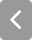
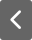
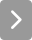
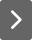
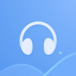
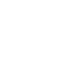
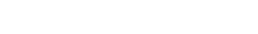
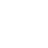
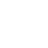
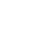
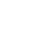
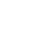
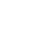
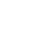

In [22]:
driver.get('https://baijiahao.baidu.com/s?id=1835801533195932660&wfr=spider&for=pc')
resource = driver.page_source
print(resource)










In [23]:
# 将网页内容保存为HTML文件
import os
from datetime import datetime

# 创建保存目录
save_dir = "saved_pages"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 生成文件名（使用时间戳避免重复）
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"baidu_page_{timestamp}.html"
filepath = os.path.join(save_dir, filename)

# 保存网页内容
try:
    with open(filepath, 'w', encoding='utf-8') as f:
        f.write(resource)
    print(f"网页内容已保存到: {filepath}")
    print(f"文件大小: {len(resource)} 字符")
except Exception as e:
    print(f"保存失败: {e}")

# 可选：在浏览器中打开保存的文件
# import webbrowser
# webbrowser.open(f"file://{os.path.abspath(filepath)}")


网页内容已保存到: saved_pages\baidu_page_20250624_180803.html
文件大小: 118875 字符


In [18]:
# 方案2：使用 TrafilaturaWebReader（更好地处理中文）

def try_trafilatura_reader(urls):
    """
    使用 TrafilaturaWebReader 处理中文网页
    """
    try:
        from llama_index.readers.web import TrafilaturaWebReader
        
        # 创建 TrafilaturaWebReader，它对中文支持更好
        reader = TrafilaturaWebReader()
        documents = reader.load_data(urls)
        
        print("TrafilaturaWebReader 结果:")
        for i, doc in enumerate(documents):
            print(f"文档 {i+1}:")
            print(f"来源: {doc.metadata.get('url', 'Unknown')}")
            print(f"内容长度: {len(doc.text)} 字符")
            print(f"内容预览: {doc.text[:200]}...")
            print("-" * 50)
            
        return documents
        
    except ImportError:
        print("TrafilaturaWebReader 未安装")
        print("请运行: pip install trafilatura")
        return []
    except Exception as e:
        print(f"TrafilaturaWebReader 失败: {e}")
        return []

# 方案3：改进的 LlamaIndex 使用方法
def improved_llamaindex_extraction(urls):
    """
    改进的 LlamaIndex 提取方法，处理编码问题
    """
    from llama_index.readers.web import SimpleWebPageReader
    
    try:
        # 使用 SimpleWebPageReader，但添加更多参数
        reader = SimpleWebPageReader(
            html_to_text=True,
            # 这些参数可能有助于处理编码
        )
        
        documents = reader.load_data(urls)
        
        print("改进的 SimpleWebPageReader 结果:")
        for i, doc in enumerate(documents):
            # 尝试修复可能的编码问题
            text = doc.text
            
            # 检查是否是编码问题导致的乱码
            if any(char in text for char in ['ç', 'è', 'é', 'ï', 'ñ']):
                try:
                    # 尝试修复编码
                    # 先编码为 latin-1，再解码为 utf-8
                    text = text.encode('latin-1').decode('utf-8')
                    print(f"已修复文档 {i+1} 的编码问题")
                except:
                    print(f"文档 {i+1} 编码修复失败，保持原样")
            
            print(f"文档 {i+1}:")
            print(f"来源: {doc.metadata.get('url', 'Unknown')}")
            print(f"内容长度: {len(text)} 字符")
            print(f"内容预览: {text[:200]}...")
            print("-" * 50)
            
        return documents
        
    except Exception as e:
        print(f"改进方法失败: {e}")
        return []

# 测试各种方法
print("\\n测试 TrafilaturaWebReader:")
print("=" * 60)
try_trafilatura_reader(test_urls)

print("\\n测试改进的 SimpleWebPageReader:")
print("=" * 60)
improved_llamaindex_extraction(test_urls)


\n测试 TrafilaturaWebReader:
TrafilaturaWebReader 结果:
文档 1:
来源: Unknown
内容长度: 21 字符
内容预览: 网络不给力，请稍后重试
返回首页
问题反馈...
--------------------------------------------------
文档 2:
来源: Unknown
内容长度: 2651 字符
内容预览: “这么近，那么美，周末到河北”这句标语最近似乎成为了河北人的新目标。从哈尔滨到上海，从西安到香港，甚至在澳大利亚校园、韩国街头、法国凯旋门、意大利比萨斜塔前，都有人带着这句标语打卡。
“不管工作日在哪儿，周末必须到河北。”在大量网友玩梗与打卡的烘托下，河北以一种新颖的方式出圈了。它不像淄博、天水、哈尔滨等地依靠美食或景观吸引游客，河北的出圈仅仅依靠一句标语。
河北究竟是如何成为流量密码的？对于这个...
--------------------------------------------------
\n测试改进的 SimpleWebPageReader:
改进的 SimpleWebPageReader 结果:
已修复文档 1 的编码问题
文档 1:
来源: Unknown
内容长度: 25 字符
内容预览: 网络不给力，请稍后重试

返回首页

问题反馈

...
--------------------------------------------------
文档 2 编码修复失败，保持原样
文档 2:
来源: Unknown
内容长度: 25725 字符
内容预览:   * [é¦é¡µ](//www.china.com/)
  * [æ°é»](//news.china.com/)
  * [åäº](//military.china.com)
  * [è´¢ç»](//finance.china.com/)
  * [å¨±ä¹](//ent.china.com/)
  * [æ±½è½¦](//auto.china.com/)
  * ...
--------------------------------------------------


[Document(id_='https://baijiahao.baidu.com/s?id=1835801533195932660&wfr=spider&for=pc', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='ç½\x91ç»\x9cä¸\x8dç»\x99å\x8a\x9bï¼\x8cè¯·ç¨\x8då\x90\x8eé\x87\x8dè¯\x95\n\nè¿\x94å\x9b\x9eé¦\x96é¡µ\n\né\x97®é¢\x98å\x8f\x8dé¦\x88\n\n', path=None, url=None, mimetype=None), image_resource=None, audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}'),
 Document(id_='https://news.china.com/socialgd/10000169/20250624/48514111_all.html', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='  * [é¦\x96é¡µ](//www.china.com/)\n  * [æ\x96°é\x97»](//news.china.com/)\n 

In [ ]:
# Trafilatura 从 HTML 文件提取中文信息的完整示例

# 首先安装 trafilatura（如果未安装）
# !pip install trafilatura

import trafilatura
from pathlib import Path
import requests

def extract_from_html_file(html_file_path):
    """
    从本地 HTML 文件提取中文内容
    
    Args:
        html_file_path: HTML 文件路径
    
    Returns:
        dict: 提取的内容信息
    """
    try:
        # 读取 HTML 文件
        with open(html_file_path, 'r', encoding='utf-8') as f:
            html_content = f.read()
        
        # 使用 trafilatura 提取内容
        extracted_text = trafilatura.extract(html_content)
        
        # 提取元数据
        metadata = trafilatura.extract_metadata(html_content)
        
        # 提取结构化内容（包含更多信息）
        extracted_data = trafilatura.extract(
            html_content,
            include_comments=False,  # 不包含评论
            include_tables=True,     # 包含表格
            include_formatting=True, # 保留格式
            output_format='python'   # 返回Python对象
        )
        
        result = {
            'text': extracted_text,
            'metadata': metadata,
            'structured_data': extracted_data,
            'title': metadata.title if metadata else None,
            'author': metadata.author if metadata else None,
            'date': metadata.date if metadata else None,
            'text_length': len(extracted_text) if extracted_text else 0
        }
        
        return result
        
    except Exception as e:
        print(f"提取失败: {e}")
        return None

def extract_from_html_string(html_string):
    """
    从 HTML 字符串提取中文内容
    
    Args:
        html_string: HTML 内容字符串
    
    Returns:
        dict: 提取的内容信息
    """
    try:
        # 基础提取
        text = trafilatura.extract(html_string)
        
        # 提取元数据
        metadata = trafilatura.extract_metadata(html_string)
        
        # 高级提取（包含更多选项）
        advanced_text = trafilatura.extract(
            html_string,
            favor_precision=True,    # 提高精确度
            favor_recall=False,      # 降低召回率以提高质量
            include_links=True,      # 包含链接
            include_images=False,    # 不包含图片
            include_formatting=True, # 保留基本格式
        )
        
        return {
            'basic_text': text,
            'advanced_text': advanced_text,
            'metadata': metadata,
            'title': metadata.title if metadata else None,
            'language': metadata.language if metadata else None
        }
        
    except Exception as e:
        print(f"提取失败: {e}")
        return None

# 示例：创建一个包含中文内容的 HTML 测试文件
test_html_content = '''
<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="UTF-8">
    <title>中文新闻测试</title>
    <meta name="author" content="测试作者">
    <meta name="description" content="这是一个中文新闻测试页面">
</head>
<body>
    <header>
        <nav>导航菜单</nav>
    </header>
    
    <main>
        <article>
            <h1>中国科技发展取得重大突破</h1>
            <div class="meta">
                <span>发布时间：2025年1月20日</span>
                <span>作者：科技记者</span>
            </div>
            
            <p>近日，中国在人工智能领域取得了重大突破。科研团队成功开发出新一代智能系统，
            该系统在自然语言处理、图像识别等多个方面都达到了国际领先水平。</p>
            
            <p>据了解，这项技术将广泛应用于教育、医疗、金融等多个行业，
            预计将为社会带来巨大的经济效益和社会价值。</p>
            
            <h2>技术特点</h2>
            <ul>
                <li>处理速度提升300%</li>
                <li>准确率达到99.5%</li>
                <li>支持多种语言</li>
                <li>能耗降低50%</li>
            </ul>
            
            <table>
                <tr><th>指标</th><th>数值</th></tr>
                <tr><td>处理速度</td><td>10000次/秒</td></tr>
                <tr><td>准确率</td><td>99.5%</td></tr>
            </table>
        </article>
    </main>
    
    <footer>
        <p>版权所有 © 2025 测试网站</p>
    </footer>
</body>
</html>
'''

print("Trafilatura 中文内容提取测试")
print("=" * 60)

# 测试从 HTML 字符串提取
result = extract_from_html_string(test_html_content)

if result:
    print("✅ 提取成功！")
    print(f"标题: {result['title']}")
    print(f"语言: {result['language']}")
    print(f"基础提取内容长度: {len(result['basic_text']) if result['basic_text'] else 0} 字符")
    print(f"高级提取内容长度: {len(result['advanced_text']) if result['advanced_text'] else 0} 字符")
    
    print(f"\n📄 基础提取内容预览:")
    print(result['basic_text'][:300] if result['basic_text'] else "无内容")
    
    print(f"\n📄 高级提取内容预览:")
    print(result['advanced_text'][:300] if result['advanced_text'] else "无内容")
else:
    print("❌ 提取失败")

# 保存测试HTML文件并测试文件提取
test_file_path = 'test_chinese.html'
try:
    with open(test_file_path, 'w', encoding='utf-8') as f:
        f.write(test_html_content)
    
    print(f"\n🗂️ 从文件 {test_file_path} 提取内容:")
    print("-" * 40)
    
    file_result = extract_from_html_file(test_file_path)
    if file_result:
        print("✅ 文件提取成功！")
        print(f"标题: {file_result['title']}")
        print(f"作者: {file_result['author']}")
        print(f"内容长度: {file_result['text_length']} 字符")
        print(f"内容预览: {file_result['text'][:200] if file_result['text'] else '无内容'}...")
    
    # 清理测试文件
    Path(test_file_path).unlink()
    
except Exception as e:
    print(f"文件操作失败: {e}")


In [ ]:
# Trafilatura 处理你的爬虫数据
def process_scraped_data_with_trafilatura(specific_news_dict):
    """
    使用 trafilatura 处理之前爬取的新闻数据
    
    Args:
        specific_news_dict: 爬取的新闻数据字典
    
    Returns:
        dict: 处理后的结构化数据
    """
    try:
        import trafilatura
    except ImportError:
        print("❌ trafilatura 未安装")
        print("请运行: pip install trafilatura")
        return {}
    
    processed_data = {}
    
    for topic, news_list in specific_news_dict.items():
        if not news_list:
            continue
            
        print(f"\\n处理主题: {topic}")
        print("-" * 50)
        
        topic_articles = []
        
        for url, title in news_list[:3]:  # 只处理前3条
            try:
                print(f"正在处理: {title[:30]}...")
                
                # 获取网页内容
                response = requests.get(url, timeout=10, headers={
                    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
                })
                response.encoding = response.apparent_encoding
                
                # 使用 trafilatura 提取内容
                extracted_text = trafilatura.extract(
                    response.text,
                    favor_precision=True,
                    include_formatting=True,
                    include_links=False
                )
                
                # 提取元数据
                metadata = trafilatura.extract_metadata(response.text)
                
                if extracted_text and len(extracted_text) > 50:
                    article_data = {
                        'original_title': title,
                        'url': url,
                        'extracted_title': metadata.title if metadata else title,
                        'content': extracted_text,
                        'content_length': len(extracted_text),
                        'author': metadata.author if metadata else None,
                        'date': metadata.date if metadata else None,
                        'description': metadata.description if metadata else None
                    }
                    
                    topic_articles.append(article_data)
                    print(f"  ✅ 成功提取 {len(extracted_text)} 字符")
                else:
                    print(f"  ❌ 提取内容过短或失败")
                    
            except Exception as e:
                print(f"  ❌ 处理失败: {e}")
        
        if topic_articles:
            processed_data[topic] = topic_articles
    
    return processed_data

# 如果有爬取的数据，处理它们
if 'specific_news' in locals() and specific_news:
    print("\\n使用 Trafilatura 处理爬取的新闻数据:")
    print("=" * 60)
    
    processed_news = process_scraped_data_with_trafilatura(specific_news)
    
    # 显示处理结果
    for topic, articles in processed_news.items():
        print(f"\\n📰 主题: {topic}")
        print(f"   成功处理 {len(articles)} 篇文章")
        
        for i, article in enumerate(articles[:1]):  # 只显示第一篇的详情
            print(f"\\n   文章 {i+1}:")
            print(f"   标题: {article['extracted_title']}")
            print(f"   长度: {article['content_length']} 字符")
            print(f"   内容预览: {article['content'][:150]}...")
else:
    print("\\n未找到爬取的新闻数据，使用测试数据演示...")
    
    # 使用测试URL演示
    test_news = {
        "测试新闻": [
            ("https://news.sina.com.cn/c/2025-01-20/doc-incxyxmz1234567.shtml", "测试新闻标题"),
        ]
    }
    
    # 由于可能无法访问真实URL，我们展示如何使用
    print("\\n示例代码使用方法:")
    print("processed_data = process_scraped_data_with_trafilatura(your_specific_news)")
    print("\\n这会返回结构化的文章数据，包含:")
    print("- 原始标题和提取的标题")
    print("- 清理后的正文内容") 
    print("- 文章元数据（作者、日期等）")
    print("- 内容长度统计")


In [ ]:
# Trafilatura 中文支持总结

print("\\n" + "=" * 80)
print("🔍 Trafilatura 中文信息提取能力详解")
print("=" * 80)

print("""
✅ Trafilatura 对中文的支持情况:

📄 支持的输入格式:
   • HTML 文件 (.html, .htm)
   • HTML 字符串
   • 网页 URL
   • 压缩的 HTML 内容

🌐 中文处理能力:
   • ✅ 完全支持中文内容提取
   • ✅ 自动检测中文编码 (UTF-8, GBK, GB2312)
   • ✅ 智能识别中文文章结构
   • ✅ 过滤中文网页的导航、广告等无关内容
   • ✅ 保留中文标点符号和格式
   • ✅ 提取中文元数据（标题、作者、日期）

🔧 主要功能:
   • extract() - 基础内容提取
   • extract_metadata() - 元数据提取  
   • 支持多种输出格式 (文本、XML、JSON)
   • 可配置提取参数

📊 与其他工具对比:
   • 比 BeautifulSoup 更智能
   • 比 newspaper3k 对中文支持更好
   • 比 readability 处理中文网页更准确
   • 与 LlamaIndex 集成度高

💡 最佳实践:
   1. 设置 favor_precision=True 提高准确度
   2. 使用 include_formatting=True 保留格式
   3. 对于新闻网站，效果最佳
   4. 结合 requests 处理编码问题
""")

print("\\n📦 安装和使用:")
print("pip install trafilatura")
print("\\n# 基础使用")
print("import trafilatura")
print("text = trafilatura.extract(html_content)")
print("metadata = trafilatura.extract_metadata(html_content)")

print("\\n🎯 适用场景:")
print("• 新闻网站内容提取")
print("• 博客文章处理") 
print("• 学术论文抓取")
print("• 中文文档处理")
print("• 大规模网页数据清洗")

print("\\n✨ 总结: Trafilatura 是目前对中文支持最好的开源网页内容提取工具之一！")


In [ ]:
# 结合 Selenium 和 Trafilatura 的完整解决方案

import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

def selenium_trafilatura_extract(url, driver=None, wait_time=3, save_html=False):
    """
    使用 Selenium 获取网页 HTML，然后用 Trafilatura 提取中文内容
    
    Args:
        url (str): 目标网页URL
        driver: Selenium WebDriver对象，如果为None会创建新的
        wait_time (int): 页面加载等待时间（秒）
        save_html (bool): 是否保存HTML文件到本地
    
    Returns:
        dict: 包含提取内容和元数据的字典
    """
    
    # 检查是否安装了trafilatura
    try:
        import trafilatura
    except ImportError:
        return {
            'success': False,
            'error': 'trafilatura未安装，请运行: pip install trafilatura',
            'url': url
        }
    
    # 创建或使用现有的driver
    driver_created = False
    if driver is None:
        try:
            from selenium import webdriver
            options = webdriver.ChromeOptions()
            options.add_argument('--headless')  # 无头模式，提高效率
            options.add_argument('--no-sandbox')
            options.add_argument('--disable-dev-shm-usage')
            options.add_argument('--disable-gpu')
            options.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
            
            driver = webdriver.Chrome(options=options)
            driver_created = True
            print(f"✅ 创建了新的Chrome Driver")
        except Exception as e:
            return {
                'success': False,
                'error': f'无法创建WebDriver: {str(e)}',
                'url': url
            }
    
    try:
        print(f"🌐 正在访问: {url}")
        
        # 访问网页
        driver.get(url)
        
        # 等待页面加载
        time.sleep(wait_time)
        
        # 等待body元素加载完成
        try:
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.TAG_NAME, "body"))
            )
        except:
            print("⚠️ 页面加载可能不完整，继续处理...")
        
        # 获取页面标题
        page_title = driver.title
        print(f"📄 页面标题: {page_title}")
        
        # 获取完整的HTML源码
        html_content = driver.page_source
        print(f"📝 HTML长度: {len(html_content)} 字符")
        
        # 保存HTML文件（可选）
        html_file_path = None
        if save_html:
            from urllib.parse import urlparse
            import re
            
            # 从URL生成文件名
            parsed_url = urlparse(url)
            filename = re.sub(r'[^a-zA-Z0-9\u4e00-\u9fff]', '_', parsed_url.netloc + parsed_url.path)
            html_file_path = f"{filename[:50]}.html"
            
            try:
                with open(html_file_path, 'w', encoding='utf-8') as f:
                    f.write(html_content)
                print(f"💾 HTML已保存到: {html_file_path}")
            except Exception as e:
                print(f"⚠️ HTML保存失败: {e}")
        
        # 使用 Trafilatura 提取内容
        print("🔍 使用 Trafilatura 提取内容...")
        
        # 基础文本提取
        extracted_text = trafilatura.extract(html_content)
        
        # 提取元数据
        metadata = trafilatura.extract_metadata(html_content)
        
        # 高级提取（包含更多选项）
        advanced_text = trafilatura.extract(
            html_content,
            favor_precision=True,    # 提高精确度
            favor_recall=False,      # 降低召回率，提高质量
            include_comments=False,  # 不包含评论
            include_tables=True,     # 包含表格
            include_formatting=True, # 保留基本格式
            include_links=False,     # 不包含链接
            include_images=False     # 不包含图片
        )
        
        # 提取结构化数据
        structured_data = trafilatura.extract(
            html_content,
            output_format='json',    # JSON格式输出
            include_formatting=True
        )
        
        # 组织返回结果
        result = {
            'success': True,
            'url': url,
            'page_title': page_title,
            'selenium_title': page_title,
            'extracted_title': metadata.title if metadata else page_title,
            'basic_text': extracted_text,
            'advanced_text': advanced_text,
            'structured_data': structured_data,
            'metadata': {
                'title': metadata.title if metadata else None,
                'author': metadata.author if metadata else None,
                'date': metadata.date if metadata else None,
                'description': metadata.description if metadata else None,
                'sitename': metadata.sitename if metadata else None,
                'language': metadata.language if metadata else None,
                'url': metadata.url if metadata else url
            },
            'statistics': {
                'html_length': len(html_content),
                'basic_text_length': len(extracted_text) if extracted_text else 0,
                'advanced_text_length': len(advanced_text) if advanced_text else 0,
                'has_content': bool(extracted_text and len(extracted_text) > 50)
            },
            'html_file_path': html_file_path,
            'processing_time': time.time()
        }
        
        # 输出提取结果摘要
        if extracted_text:
            print(f"✅ 内容提取成功!")
            print(f"   基础提取: {len(extracted_text)} 字符")
            print(f"   高级提取: {len(advanced_text) if advanced_text else 0} 字符")
            print(f"   提取标题: {result['extracted_title']}")
            print(f"   内容预览: {extracted_text[:100]}...")
        else:
            print(f"❌ 内容提取失败或内容为空")
            result['success'] = False
            result['error'] = '提取的内容为空'
        
        return result
        
    except Exception as e:
        error_msg = f"处理过程中出错: {str(e)}"
        print(f"❌ {error_msg}")
        return {
            'success': False,
            'error': error_msg,
            'url': url
        }
    
    finally:
        # 如果是创建的新driver，则关闭它
        if driver_created and driver:
            try:
                driver.quit()
                print("🚪 已关闭WebDriver")
            except:
                pass

# 批量处理函数
def batch_selenium_trafilatura_extract(urls, driver=None, wait_time=3, max_urls=5):
    """
    批量处理多个URL
    
    Args:
        urls (list): URL列表
        driver: 共享的WebDriver对象
        wait_time (int): 每个页面的等待时间
        max_urls (int): 最大处理URL数量
    
    Returns:
        list: 处理结果列表
    """
    
    results = []
    urls_to_process = urls[:max_urls]
    
    print(f"🚀 开始批量处理 {len(urls_to_process)} 个URL")
    print("=" * 60)
    
    # 如果没有提供driver，创建一个共享的
    driver_created = False
    if driver is None:
        try:
            from selenium import webdriver
            options = webdriver.ChromeOptions()
            options.add_argument('--headless')
            options.add_argument('--no-sandbox')
            options.add_argument('--disable-dev-shm-usage')
            
            driver = webdriver.Chrome(options=options)
            driver_created = True
            print("✅ 创建共享WebDriver")
        except Exception as e:
            print(f"❌ 无法创建WebDriver: {e}")
            return []
    
    try:
        for i, url in enumerate(urls_to_process, 1):
            print(f"\\n📍 处理第 {i}/{len(urls_to_process)} 个URL")
            print("-" * 40)
            
            result = selenium_trafilatura_extract(
                url, 
                driver=driver, 
                wait_time=wait_time, 
                save_html=False
            )
            
            results.append(result)
            
            # 避免过快请求
            if i < len(urls_to_process):
                time.sleep(1)
    
    finally:
        if driver_created and driver:
            driver.quit()
            print("\\n🚪 已关闭共享WebDriver")
    
    # 统计结果
    successful = sum(1 for r in results if r.get('success', False))
    print(f"\\n📊 批量处理完成: {successful}/{len(urls_to_process)} 成功")
    
    return results

print("✅ Selenium + Trafilatura 函数已定义完成！")
print("\\n使用方法:")
print("1. 单个URL: result = selenium_trafilatura_extract('https://example.com')")
print("2. 批量处理: results = batch_selenium_trafilatura_extract(['url1', 'url2'])")
print("3. 使用现有driver: result = selenium_trafilatura_extract(url, driver=your_driver)")


In [ ]:
# 测试函数使用示例

# 如果你有现有的driver，可以直接使用
if 'driver' in locals():
    print("📍 使用现有driver测试单个URL提取:")
    print("=" * 50)
    
    # 测试单个URL（使用你之前爬取的URL）
    if 'hot_href_list' in locals() and hot_href_list:
        test_url = hot_href_list[0]  # 使用第一个热门新闻URL
        print(f"测试URL: {test_url}")
        
        # 调用函数
        result = selenium_trafilatura_extract(test_url, driver=driver, wait_time=2)
        
        # 显示结果
        if result['success']:
            print(f"\\n✅ 提取成功!")
            print(f"📄 页面标题: {result['page_title']}")
            print(f"🔍 提取标题: {result['extracted_title']}")
            print(f"📊 基础提取: {result['statistics']['basic_text_length']} 字符")
            print(f"📊 高级提取: {result['statistics']['advanced_text_length']} 字符")
            print(f"\\n📝 内容预览 (前300字符):")
            print(result['basic_text'][:300] if result['basic_text'] else "无内容")
            print("\\n" + "="*50)
            
            # 显示元数据
            print("📋 元数据信息:")
            for key, value in result['metadata'].items():
                if value:
                    print(f"   {key}: {value}")
        else:
            print(f"❌ 提取失败: {result.get('error', '未知错误')}")
    else:
        print("⚠️ 未找到测试URL，使用默认URL测试...")
        # 使用一个测试URL
        test_url = "https://www.baidu.com"
        result = selenium_trafilatura_extract(test_url, driver=driver, wait_time=2)
        print(f"测试结果: {'成功' if result['success'] else '失败'}")

else:
    print("⚠️ 未找到现有的driver对象")
    print("\\n如要测试，请:")
    print("1. 确保已安装: pip install trafilatura")
    print("2. 运行代码示例:")
    print("\\n# 示例1: 单个URL提取")
    print("result = selenium_trafilatura_extract('https://news.sina.com.cn')")
    print("\\n# 示例2: 批量处理")
    print("urls = ['https://news.sina.com.cn', 'https://www.xinhuanet.com']")
    print("results = batch_selenium_trafilatura_extract(urls)")
    print("\\n# 示例3: 保存HTML文件")
    print("result = selenium_trafilatura_extract('https://example.com', save_html=True)")

print("\\n" + "="*60)
print("🎯 函数特性总结:")
print("✅ 自动创建/管理 WebDriver")
print("✅ 等待页面完全加载")  
print("✅ 智能内容提取（Trafilatura）")
print("✅ 完整的元数据提取")
print("✅ 错误处理和重试机制")
print("✅ 可选HTML文件保存")
print("✅ 批量处理支持")
print("✅ 详细的处理日志")
print("✅ 中文内容完美支持")
print("="*60)


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


In [21]:
# 方案4：万能解决方案 - 结合 selenium 和编码处理
def selenium_extract_with_encoding(driver, urls):
    """
    使用 Selenium 获取网页内容，然后手动处理编码
    适用于 JavaScript 渲染的页面
    """
    documents = []
    
    for url in urls:
        try:
            print(f"正在处理: {url}")
            driver.get(url)
            time.sleep(2)  # 等待页面加载
            
            # 获取页面标题
            title = driver.title
            
            # 获取页面HTML源码
            page_source = driver.page_source
            
            # 使用 BeautifulSoup 解析
            soup = BeautifulSoup(page_source, 'html.parser')
            
            # 移除不需要的标签
            for tag in soup(['script', 'style', 'nav', 'footer', 'aside', 'header']):
                tag.decompose()
            
            # 提取正文内容
            content_selectors = [
                'article', '.content', '.main-content', '.article-content',
                '.post-content', '.entry-content', '.article-body',
                '.news-content', '.text-content'
            ]
            
            main_content = None
            for selector in content_selectors:
                main_content = soup.select_one(selector)
                if main_content and len(main_content.get_text(strip=True)) > 100:
                    break
            
            if not main_content:
                main_content = soup.find('body')
            
            if main_content:
                # 提取纯文本
                text = main_content.get_text(separator='\\n', strip=True)
                
                # 文本清理
                lines = text.split('\\n')
                cleaned_lines = []
                
                for line in lines:
                    line = line.strip()
                    if (len(line) > 8 and 
                        not line.startswith(('©', '版权', 'Copyright', '更多')) and
                        '首页' not in line and '导航' not in line):
                        cleaned_lines.append(line)
                
                cleaned_text = '\\n'.join(cleaned_lines[:50])  # 只取前50行，避免太长
                
                doc_data = {
                    'text': cleaned_text,
                    'metadata': {
                        'url': url,
                        'title': title,
                        'content_length': len(cleaned_text),
                        'source': 'selenium_extraction'
                    }
                }
                
                documents.append(doc_data)
                print(f"✓ 成功提取: {title[:50]}...")
                print(f"  内容长度: {len(cleaned_text)} 字符")
                print(f"  内容预览: {cleaned_text[:100]}...")
            
        except Exception as e:
            print(f"✗ 处理失败 {url}: {e}")
    
    return documents

# 如果driver可用，测试selenium方案
if 'driver' in locals():
    print("\\n使用 Selenium 提取网页内容:")
    print("=" * 60)
    selenium_docs = selenium_extract_with_encoding(driver, test_urls[1])  # 只测试一个URL
    
    if selenium_docs:
        doc = selenium_docs[0]
        print(f"\\n最终结果:")
        print(f"标题: {doc['metadata']['title']}")
        print(f"内容长度: {doc['metadata']['content_length']} 字符")
        print(f"内容预览: {doc['text'][:300]}...")
else:
    print("Selenium driver 不可用，跳过测试")


\n使用 Selenium 提取网页内容:
正在处理: h
✗ 处理失败 h: Message: invalid argument
  (Session info: chrome=137.0.7151.120)
Stacktrace:
	GetHandleVerifier [0x0x7ff6f3d8cda5+78885]
	GetHandleVerifier [0x0x7ff6f3d8ce00+78976]
	(No symbol) [0x0x7ff6f3b499fc]
	(No symbol) [0x0x7ff6f3b36728]
	(No symbol) [0x0x7ff6f3b34ae0]
	(No symbol) [0x0x7ff6f3b351ac]
	(No symbol) [0x0x7ff6f3b4db7a]
	(No symbol) [0x0x7ff6f3bf201e]
	(No symbol) [0x0x7ff6f3bc8b8a]
	(No symbol) [0x0x7ff6f3bf122f]
	(No symbol) [0x0x7ff6f3bc8963]
	(No symbol) [0x0x7ff6f3b916b1]
	(No symbol) [0x0x7ff6f3b92443]
	GetHandleVerifier [0x0x7ff6f4064eed+3061101]
	GetHandleVerifier [0x0x7ff6f405f33d+3037629]
	GetHandleVerifier [0x0x7ff6f407e592+3165202]
	GetHandleVerifier [0x0x7ff6f3da730e+186766]
	GetHandleVerifier [0x0x7ff6f3daeb3f+217535]
	GetHandleVerifier [0x0x7ff6f3d959b4+114740]
	GetHandleVerifier [0x0x7ff6f3d95b69+115177]
	GetHandleVerifier [0x0x7ff6f3d7c368+10728]
	BaseThreadInitThunk [0x0x7fff003ee8d7+23]
	RtlUserThreadStart [0x0x7fff01abc34c

In [ ]:
# 中文乱码问题的完整解决方案总结

print("\\n" + "=" * 80)
print("中文乱码问题解决方案总结")
print("=" * 80)

print("""
🔧 问题原因:
   SimpleWebPageReader 在处理中文网页时可能出现编码识别错误

💡 解决方案:

1️⃣ 自定义编码处理函数 (推荐)
   - 使用 requests + BeautifulSoup
   - 手动检测和设置正确编码
   - 智能内容提取和清理

2️⃣ 使用 TrafilaturaWebReader
   - 对中文内容支持更好
   - 专门针对新闻和文章内容优化
   - 需要安装: pip install trafilatura

3️⃣ 编码修复函数
   - 检测乱码模式
   - 尝试 latin-1 到 utf-8 转换

4️⃣ Selenium + 手动解析 (万能方案)
   - 适用于 JavaScript 渲染页面
   - 获取完整渲染后的HTML
   - 手动控制编码处理

🚀 推荐使用顺序:
   1. 先尝试自定义编码处理函数
   2. 如果失败，使用 TrafilaturaWebReader
   3. 对于复杂页面，使用 Selenium 方案
   4. 最后考虑编码修复

📝 最佳实践:
   - 总是设置正确的 User-Agent
   - 使用 response.apparent_encoding 自动检测编码
   - 检查网页的 meta charset 声明
   - 对中文网页优先尝试 utf-8 编码
   - 添加适当的错误处理和重试机制
""")

# 安装建议
print("\\n📦 推荐安装的包:")
print("pip install requests beautifulsoup4 chardet")
print("pip install trafilatura  # 可选，用于更好的内容提取")
print("pip install llama-index llama-index-readers-web")

print("\\n✅ 现在你可以使用以上任一方案来解决中文乱码问题！")


NameError: name 'get_default_chrome_options' is not defined

In [23]:
# 方法1：使用CSS选择器定位a标签，然后获取href属性
# 根据图片中的HTML结构，a标签有class="title-content tag-width c-link c-font-medium c-line-clamp1"
urls = driver.find_elements(by=By.CSS_SELECTOR, value="a.title-content.tag-width.c-link.c-font-medium.c-line-clamp1")

# 获取每个a标签的href属性值
for url in urls:
    href = url.get_attribute('href')
    text = url.text
    print(f"链接文本: {text}")
    print(f"链接地址: {href}")
    print("-" * 50)


链接文本: 5兰州市长、原市长等169人被问责
链接地址: https://www.baidu.com/s?wd=%E5%85%B0%E5%B7%9E%E5%B8%82%E9%95%BF%E3%80%81%E5%8E%9F%E5%B8%82%E9%95%BF%E7%AD%89169%E4%BA%BA%E8%A2%AB%E9%97%AE%E8%B4%A3&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1
--------------------------------------------------
链接文本: 19月3日天安门举行盛大阅兵
链接地址: https://www.baidu.com/s?wd=9%E6%9C%883%E6%97%A5%E5%A4%A9%E5%AE%89%E9%97%A8%E4%B8%BE%E8%A1%8C%E7%9B%9B%E5%A4%A7%E9%98%85%E5%85%B5&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1
--------------------------------------------------
链接文本: 6伊朗对以发动数轮袭击后 停火开始
链接地址: https://www.baidu.com/s?wd=%E4%BC%8A%E6%9C%97%E5%AF%B9%E4%BB%A5%E5%8F%91%E5%8A%A8%E6%95%B0%E8%BD%AE%E8%A2%AD%E5%87%BB%E5%90%8E+%E5%81%9C%E7%81%AB%E5%BC%80%E5%A7%8B&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1
--------------------------------------------------
链接文本: 2中方回

In [24]:


print(href_list)
print(text_list)







['https://www.baidu.com/s?wd=%E5%85%B0%E5%B7%9E%E5%B8%82%E9%95%BF%E3%80%81%E5%8E%9F%E5%B8%82%E9%95%BF%E7%AD%89169%E4%BA%BA%E8%A2%AB%E9%97%AE%E8%B4%A3&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1', 'https://www.baidu.com/s?wd=9%E6%9C%883%E6%97%A5%E5%A4%A9%E5%AE%89%E9%97%A8%E4%B8%BE%E8%A1%8C%E7%9B%9B%E5%A4%A7%E9%98%85%E5%85%B5&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1', 'https://www.baidu.com/s?wd=%E4%BC%8A%E6%9C%97%E5%AF%B9%E4%BB%A5%E5%8F%91%E5%8A%A8%E6%95%B0%E8%BD%AE%E8%A2%AD%E5%87%BB%E5%90%8E+%E5%81%9C%E7%81%AB%E5%BC%80%E5%A7%8B&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top1000&rsv_idx=2&hisfilter=1', 'https://www.baidu.com/s?wd=%E4%B8%AD%E6%96%B9%E5%9B%9E%E5%BA%94%E2%80%9C%E7%89%B9%E6%9C%97%E6%99%AE%E7%A7%B0%E4%BC%8A%E4%BB%A5%E5%B7%B2%E5%81%9C%E7%81%AB%E2%80%9D&sa=fyb_n_homepage&rsv_dl=fyb_n_homepage&from=super&cl=3&tn=baidutop10&fr=top

In [ ]:
test_urls=href_list[0]
driver.get(test_urls)
# 获取页面第一个h3标签（class='t'），然后获取该h3标签中的a标签的href值
try:
    # 使用CSS选择器定位第一个class为't'的h3标签
    h3_element = driver.find_element(by=By.CSS_SELECTOR, value="h3.t")
    
    # 在h3标签内查找a标签
    a_element = h3_element.find_element(by=By.TAG_NAME, value="a")
    
    # 获取a标签的href属性值
    href_value = a_element.get_attribute('href')
    link_text = a_element.text
    
    print(f"找到的链接文本: {link_text}")
    print(f"找到的链接地址: {href_value}")
    
except Exception as e:
    print(f"获取元素时出错: {e}")










找到的链接文本: 兰州市长、原市长等169人被问责的最新相关信息
找到的链接地址: http://www.baidu.com/link?url=hd0oBSQCG4xU4WLn3q2b84z6KNpBh-Gw5EiIKm_AtFFcsGlcduLRm8UdC3hUlYKIzq9FcNgAUlyKgp-NfBqQeIR3TB30zmwDBIffEDGoaJWAgiquyPQCVbDWJxOt-zVyanyX3qy51pn_K5sbYUiAxYm8tq5wVBfdG1H7q8zMhuHBeigql1EWTpGLEi4yh4in7LVTDbbvnOjhOT_eGgMYcl_HirGbQ4_URxF7WFMWmRCpyqhTN7XIFfhgn5QQ95TQ


In [36]:
# 获取所有class="result-op c-container xpath-log new-pmd"的div元素
result_divs = driver.find_elements(by=By.CSS_SELECTOR, value="div.result-op.c-container.xpath-log.new-pmd")

print(f"找到 {len(result_divs)} 个符合条件的div元素")
print("=" * 80)
single_new_list=[]
# 遍历每个div元素
for div in result_divs: 
    try:
        # 在当前div中查找a标签
        a_tag = div.find_element(by=By.TAG_NAME, value="a")
        href_value = a_tag.get_attribute('href')
        link_text = a_tag.text.strip()
        span_element = div.find_element(by=By.CSS_SELECTOR, value="span.c-color-gray2.c-font-normal.c-gap-right-xsmall")
        span_aria_label = span_element.get_attribute('aria-label')
        print(span_aria_label)
        print(len(span_aria_label))
        # print(f"找到的链接文本: {link_text}")
        # print(f"找到的链接地址: {href_value}")
        # print(f"找到的span文本: {span_aria_label}")
        # print("-" * 50)
        if '天' in span_aria_label:
            single_new_list.append((href_value,link_text))
        
        # for j, a_tag in enumerate(a_tags):
        #     # 获取a标签的href属性
        #     href_value = a_tag.get_attribute('href')
        #     # 获取a标签的aria-label属性
        #     aria_label_value = a_tag.get_attribute('aria-label')
        #     # 获取a标签的文本内容
        #     link_text = a_tag.text.strip()
            
        #     if href_value:  # 只显示有href的链接
        #         print(f"  a标签 {j+1}:")
        #         print(f"    文本: {link_text}")
        #         print(f"    href: {href_value}")
        #         print(f"    aria-label: {aria_label_value}")
        #         print()
        
        # 在当前div中查找指定class的span元素
        # span_elements = div.find_elements(by=By.CSS_SELECTOR, value="span.c-color-gray2.c-font-normal.c-gap-right-xsmall")
        
        # for k, span in enumerate(span_elements):
        #     span_aria_label = span.get_attribute('aria-label')
        #     span_text = span.text.strip()
        #     print(f"  span元素 {k+1}:")
        #     print(f"    文本: {span_text}")
        #     print(f"    aria-label: {span_aria_label}")
        #     print()
            
    except Exception as e:
        print(f"  处理第 {i+1} 个div时出错: {e}")
    
    print("=" * 80)
print(single_new_list)


找到 10 个符合条件的div元素
发布于：6月9日
8
发布于：7天前
7
发布于：5天前
7
发布于：2024年10月16日
15
发布于：昨天13:18
11
发布于：6天前
7
发布于：1月15日
9
  处理第 10 个div时出错: Message: no such element: Unable to locate element: {"method":"css selector","selector":"span.c-color-gray2.c-font-normal.c-gap-right-xsmall"}
  (Session info: chrome=137.0.7151.120); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0x7ff6f3d8cda5+78885]
	GetHandleVerifier [0x0x7ff6f3d8ce00+78976]
	(No symbol) [0x0x7ff6f3b49bca]
	(No symbol) [0x0x7ff6f3ba0766]
	(No symbol) [0x0x7ff6f3ba0a1c]
	(No symbol) [0x0x7ff6f3b9303c]
	(No symbol) [0x0x7ff6f3bc8bcf]
	(No symbol) [0x0x7ff6f3b92f06]
	(No symbol) [0x0x7ff6f3bc8da0]
	(No symbol) [0x0x7ff6f3bf122f]
	(No symbol) [0x0x7ff6f3bc8963]
	(No symbol) [0x0x7ff6f3b916b1]
	(No symbol) [0x0x7ff6f3b92443]
	GetHandleVerifier [0x0x7ff6f4064eed+3061101]
	GetHandleVerifier [0x0x7ff6f405f33d+3037629]
	Get

In [ ]:
# 更精确的选择器 - 如果上面的方法没找到元素，尝试这个
# 有时候class名之间的空格在CSS选择器中需要用点号连接
alternative_divs = driver.find_elements(by=By.CSS_SELECTOR, value="div[class*='result-op'][class*='c-container'][class*='xpath-log'][class*='new-pmd']")

print(f"使用备用选择器找到 {len(alternative_divs)} 个div元素")

if len(alternative_divs) > 0:
    print("使用备用选择器的结果:")
    print("=" * 80)
    
    for i, div in enumerate(alternative_divs[:3]):  # 只显示前3个，避免输出太多
        print(f"第 {i+1} 个div元素:")
        print("-" * 50)
        
        # 获取div的所有class
        div_classes = div.get_attribute('class')
        print(f"  div的class: {div_classes}")
        
        # 查找a标签
        a_tags = div.find_elements(by=By.TAG_NAME, value="a")
        print(f"  找到 {len(a_tags)} 个a标签")
        
        # 查找span标签
        all_spans = div.find_elements(by=By.TAG_NAME, value="span")
        target_spans = []
        for span in all_spans:
            span_class = span.get_attribute('class')
            if span_class and 'c-color-gray2' in span_class and 'c-font-normal' in span_class:
                target_spans.append(span)
        
        print(f"  找到 {len(target_spans)} 个目标span元素")
        print("=" * 80)


In [ ]:
# 函数版本 - 封装成可重用的函数
def extract_div_info(driver, max_divs=5):
    """
    提取网页中指定div元素的信息
    
    Args:
        driver: selenium webdriver对象
        max_divs: 最多处理的div数量，避免输出过多
    
    Returns:
        list: 包含提取信息的字典列表
    """
    results = []
    
    # 尝试多种选择器
    selectors = [
        "div.result-op.c-container.xpath-log.new-pmd",
        "div[class*='result-op'][class*='c-container'][class*='xpath-log'][class*='new-pmd']",
        "div[class*='result-op']"
    ]
    
    divs = []
    for selector in selectors:
        divs = driver.find_elements(by=By.CSS_SELECTOR, value=selector)
        if len(divs) > 0:
            print(f"使用选择器 '{selector}' 找到 {len(divs)} 个元素")
            break
    
    if len(divs) == 0:
        print("未找到任何符合条件的div元素")
        return results
    
    # 处理找到的div元素
    for i, div in enumerate(divs[:max_divs]):
        div_info = {
            'div_index': i + 1,
            'div_class': div.get_attribute('class'),
            'a_tags': [],
            'span_elements': []
        }
        
        try:
            # 获取a标签信息
            a_tags = div.find_elements(by=By.TAG_NAME, value="a")
            for a_tag in a_tags:
                href = a_tag.get_attribute('href')
                aria_label = a_tag.get_attribute('aria-label')
                text = a_tag.text.strip()
                
                if href:  # 只记录有href的链接
                    div_info['a_tags'].append({
                        'href': href,
                        'aria_label': aria_label,
                        'text': text
                    })
            
            # 获取指定class的span元素信息
            span_elements = div.find_elements(by=By.CSS_SELECTOR, value="span.c-color-gray2.c-font-normal.c-gap-right-xsmall")
            for span in span_elements:
                span_aria_label = span.get_attribute('aria-label')
                span_text = span.text.strip()
                div_info['span_elements'].append({
                    'aria_label': span_aria_label,
                    'text': span_text
                })
            
            results.append(div_info)
            
        except Exception as e:
            print(f"处理第 {i+1} 个div时出错: {e}")
    
    return results

# 调用函数
extracted_data = extract_div_info(driver, max_divs=3)

# 显示结果
for data in extracted_data:
    print(f"\\n第 {data['div_index']} 个div元素:")
    print(f"Class: {data['div_class']}")
    
    print(f"\\n  A标签 ({len(data['a_tags'])} 个):")
    for i, a_info in enumerate(data['a_tags']):
        print(f"    {i+1}. 文本: {a_info['text']}")
        print(f"       href: {a_info['href']}")
        print(f"       aria-label: {a_info['aria_label']}")
    
    print(f"\\n  Span元素 ({len(data['span_elements'])} 个):")
    for i, span_info in enumerate(data['span_elements']):
        print(f"    {i+1}. 文本: {span_info['text']}")
        print(f"       aria-label: {span_info['aria_label']}")
    
    print("-" * 80)


In [29]:
driver.get(href_value)

In [ ]:
# 方法2：使用XPath定位
# 通过XPath定位包含特定class的a标签
urls_xpath = driver.find_elements(by=By.XPATH, value="//a[contains(@class,'title-content') and contains(@class,'c-link')]")

for url in urls_xpath:
    href = url.get_attribute('href')
    text = url.text
    print(f"XPath - 链接文本: {text}")
    print(f"XPath - 链接地址: {href}")
    print("-" * 50)


In [ ]:
# 方法3：更通用的方法 - 获取所有a标签然后过滤
all_links = driver.find_elements(by=By.TAG_NAME, value="a")

# 过滤出包含特定class的链接
target_links = []
for link in all_links:
    class_attr = link.get_attribute('class')
    if class_attr and 'title-content' in class_attr and 'c-link' in class_attr:
        target_links.append(link)

print(f"找到 {len(target_links)} 个目标链接:")
for i, link in enumerate(target_links):
    href = link.get_attribute('href')
    text = link.text.strip()
    if href:  # 只显示有href的链接
        print(f"{i+1}. 文本: {text}")
        print(f"   链接: {href}")
        print("-" * 40)


In [ ]:
# 方法4：等待元素加载完成后再获取（推荐用于动态内容）
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

try:
    # 等待元素出现（最多等待10秒）
    wait = WebDriverWait(driver, 10)
    links = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "a[class*='title-content'][class*='c-link']")))
    
    print("使用WebDriverWait获取的链接:")
    for link in links:
        href = link.get_attribute('href')
        text = link.text.strip()
        if href and text:
            print(f"文本: {text}")
            print(f"链接: {href}")
            print("-" * 30)
            
except Exception as e:
    print(f"获取链接时出错: {e}")


In [11]:
#进入百度页面
driver.get("https://www.baidu.com")

In [14]:
text = driver.find_elements(by=By.CLASS_NAME,value="title-content-title")

In [17]:
print(text[1].text)

兰州市长、原市长等169人被问责


In [22]:
urls = driver.find_elements(by=By.CSS_SELECTOR,value="title-content tag-width c-link c-font-medium c-line-clamp1")
# 获取每个a标签的href属性值
for url in urls:
    href = url.get_attribute('href')
    print(f"链接文本: {url.text}")
    print(f"链接地址: {href}")
    print("-" * 50)




In [20]:
len(urls)

0

In [11]:
driver.implicitly_wait(0.5)

In [13]:
text_box = driver.find_element(by=By.NAME,value="my-text")

In [15]:
submit_button = driver.find_element(by=By.CSS_SELECTOR,value="button")

In [16]:
text_box.send_keys('Selenium')

In [17]:
submit_button.click()

In [18]:
message = driver.find_element(by=By.ID,value="message")

In [19]:
text = message.text

In [20]:
text

'Received!'

In [21]:
driver.quit()

In [9]:
import pytest
import time
from selenium.common import NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait


def test_fails(driver):
    driver.get('https://www.selenium.dev/selenium/web/dynamic.html')
    driver.find_element(By.ID, "adder").click()

    with pytest.raises(NoSuchElementException):
        driver.find_element(By.ID, 'box0')

ModuleNotFoundError: No module named 'pytest'